Here we perform PCA regression on the data matrix assembled and saved in the  "saved_data" folder

In the later part of the code, PCA is performed on moving windows over the entire range of the data

In [3]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
import allantools


In [2]:
#import data matrix
#fpath = '../saved_data/week3_fourth_cycle/demeaned_data_matrix_fourth_cycle_week_3'
fpath = '../saved_data/week1_cycle1/demeaned_data_matrix_first_cycle_week1'

df = pd.read_csv(fpath, sep=',', header=0)

In [3]:
#df = df.iloc[0:-1:10, :]

In [4]:
df.head(2)

Unnamed: 0  613.1581342695605  613.2882643171293  613.4183935430451  \
0       -30.0         -98.646169         -53.342284        -118.585942   
1       -30.0        -147.646169        -148.342284        -195.585942   

   613.5485219466715  613.6786495273719  613.8087762845105  613.9389022174508  \
0        -211.861645        -145.965698        -187.985642        -186.366585   
1        -234.861645        -238.965698        -231.985642        -272.366585   

   614.0690273255567  614.1991516081921  ...  785.257345426425  \
0        -314.417365        -294.625502  ...      -1469.783244   
1        -134.417365        -248.625502  ...      -1344.783244   

   785.3858247710828  785.5143024593286  785.6427784905485  785.7712528641274  \
0       -1359.474947       -1294.192464       -1471.931681       -1309.164901   
1       -1442.474947       -1320.192464       -1424.931681       -1411.164901   

   785.8997255794505  786.0281966359041  786.1566660328739  786.2851337697449  \
0        -1320.80611       -1364.259771       -1519.678929       -1440.182644   
1        -1250.80611       -1490.259771       -1271.678929       -1652.182644   

   786.413599845903  
0      -1145.276082  
1      -1286.276082  

[2 rows x 1341 columns]

In [5]:
df.tail()

Unnamed: 0  613.1581342695605  613.2882643171293  613.4183935430451  \
342947       -10.0         233.353831         169.657716         146.414058   
342948       -10.0         241.353831         259.657716         163.414058   
342949       -10.0          61.353831         186.657716         356.414058   
342950       -10.0         246.353831         124.657716         132.414058   
342951       -10.0         271.353831         218.657716         205.414058   

        613.5485219466715  613.6786495273719  613.8087762845105  \
342947          20.138355         150.034302         234.014358   
342948         134.138355         164.034302         208.014358   
342949         267.138355         246.034302         262.014358   
342950         233.138355         257.034302         127.014358   
342951         115.138355         201.034302         150.014358   

        613.9389022174508  614.0690273255567  614.1991516081921  ...  \
342947         111.633415         174.582635         215.374498  ...   
342948         165.633415         212.582635         218.374498  ...   
342949          65.633415         155.582635         128.374498  ...   
342950         186.633415         146.582635         212.374498  ...   
342951         375.633415         161.582635         164.374498  ...   

        785.257345426425  785.3858247710828  785.5143024593286  \
342947         16.216756         100.525053        -227.192464   
342948       -362.783244        -161.474947        -165.192464   
342949        247.216756        -142.474947          88.807536   
342950       -289.783244        -390.474947        -198.192464   
342951         -0.783244          -9.474947         -64.192464   

        785.6427784905485  785.7712528641274  785.8997255794505  \
342947        -113.931681          91.835099         -222.80611   
342948           9.068319        -104.164901         -215.80611   
342949         285.068319          99.835099          179.19389   
342950        -193.931681         -16.164901         -297.80611   
342951        -233.931681         -94.164901          -26.80611   

        786.0281966359041  786.1566660328739  786.2851337697449  \
342947          89.740229          40.321071          30.817356   
342948        -170.259771        -189.678929        -152.182644   
342949          -4.259771          -9.678929         119.817356   
342950        -250.259771        -193.678929         -25.182644   
342951        -165.259771        -144.678929          -4.182644   

        786.413599845903  
342947        -97.276082  
342948       -136.276082  
342949         13.723918  
342950        -15.276082  
342951       -164.276082  

[5 rows x 1341 columns]

In [6]:
df.shape

(342952, 1341)

In [7]:
# slice the df into X and y
col_list = df.columns

X = df[col_list[1:]]
y = df[col_list[0]]; y = y+273.15

In [8]:
y = (np.floor(y)).astype(int)

<AxesSubplot:>

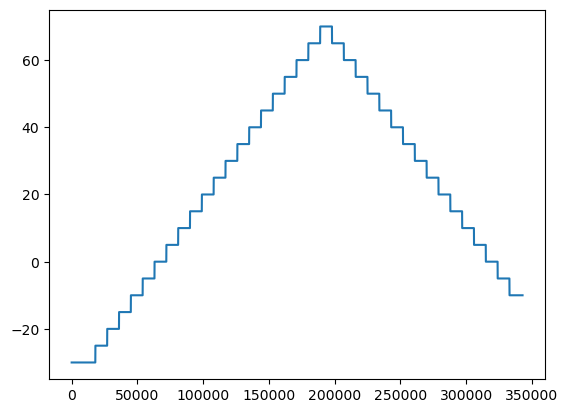

In [9]:
df[col_list[0]].plot()

In [10]:
X_train, X_test, y_train, y_test = X[:195000], X[195000:], y[:195000], y[195000:]

In [11]:
# split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


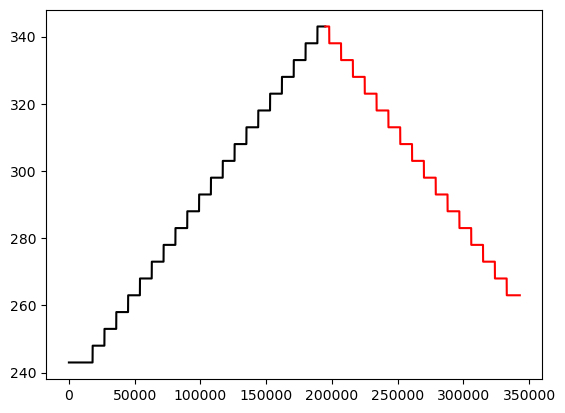

In [12]:
plt.plot(X_train.index.values, y_train.values, 'k')
plt.plot(X_test.index.values, y_test.values, 'r')

In [4]:
x_label = X.columns.astype('float').values

NameError: name 'X' is not defined

In [1]:
# specify the number of componenets
n_comps = 5
# # Create a Dask PCA object
lda_ = LinearDiscriminantAnalysis(n_components=n_comps, solver='svd')

NameError: name 'LinearDiscriminantAnalysis' is not defined

In [15]:
# Fit the LDA model
lda_.fit(X, y) 

LinearDiscriminantAnalysis(n_components=5)

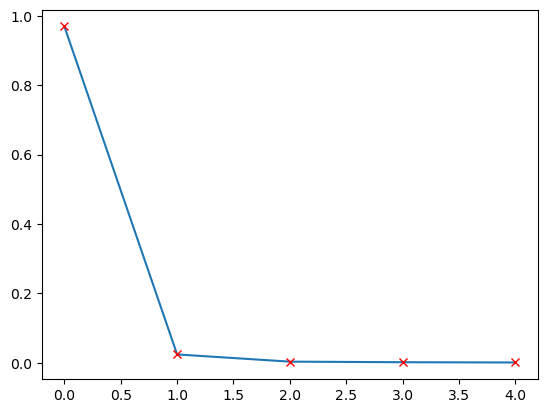

In [16]:
plt.plot(lda_.explained_variance_ratio_)
plt.plot(lda_.explained_variance_ratio_, 'rx')

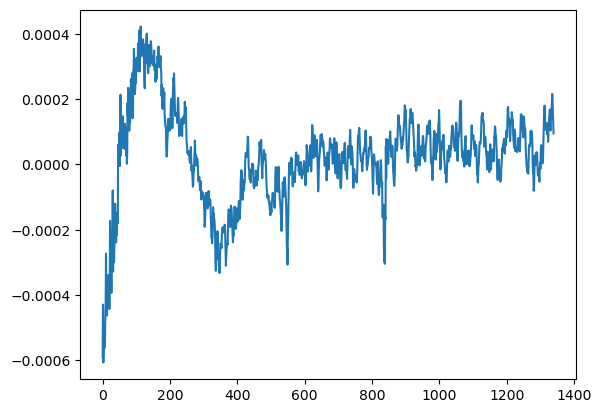

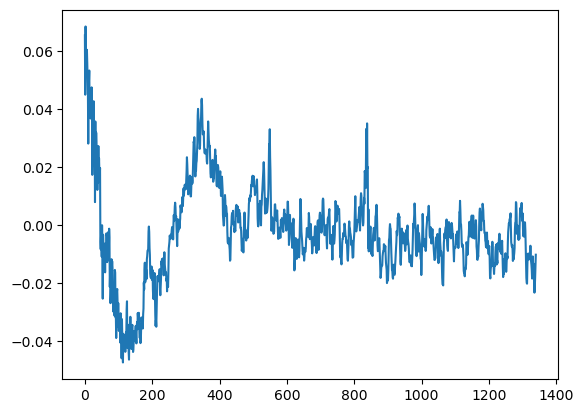

In [17]:
plt.plot(lda_.scalings_[:, 0]); plt.show()
plt.plot(lda_.coef_[2])

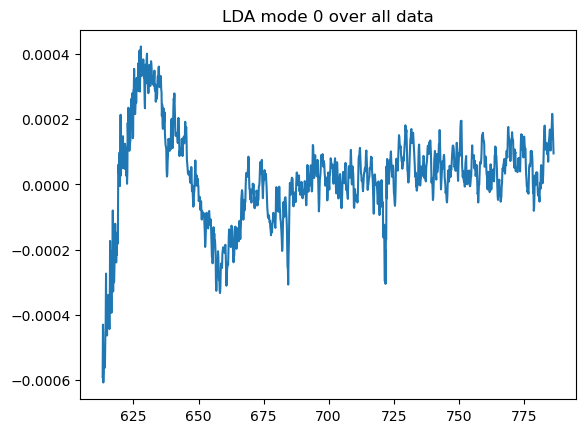

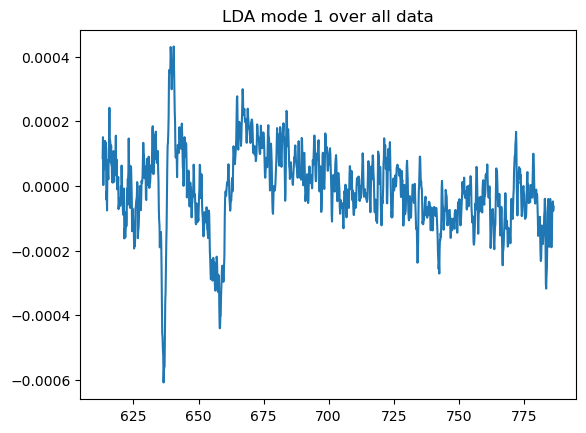

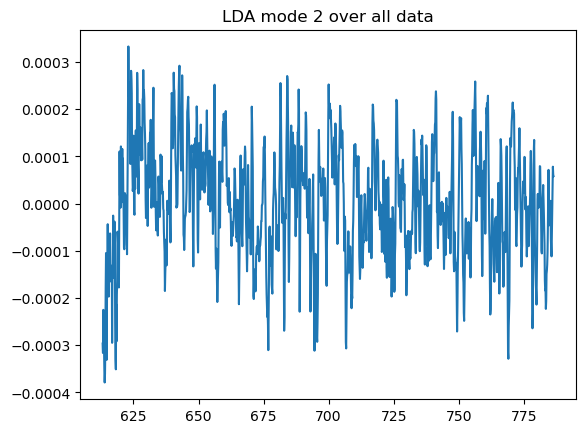

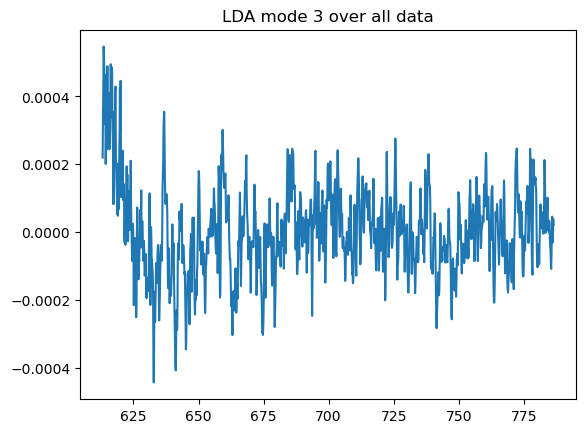

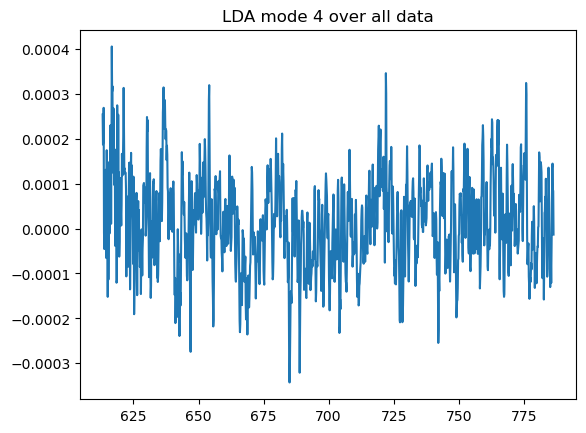

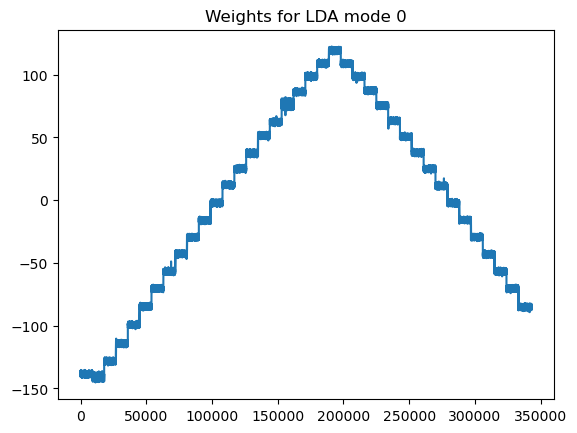

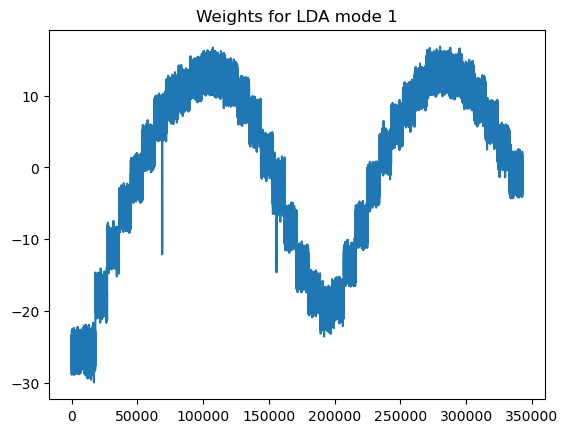

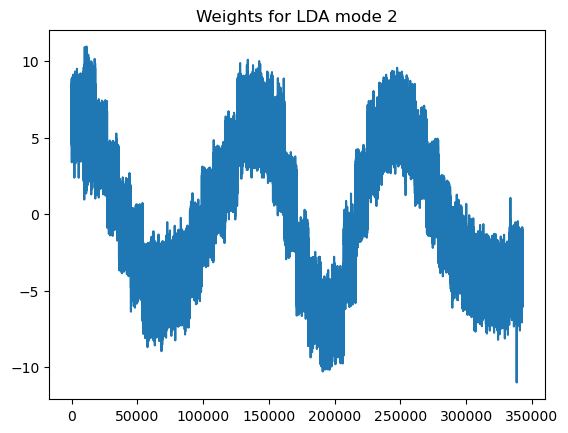

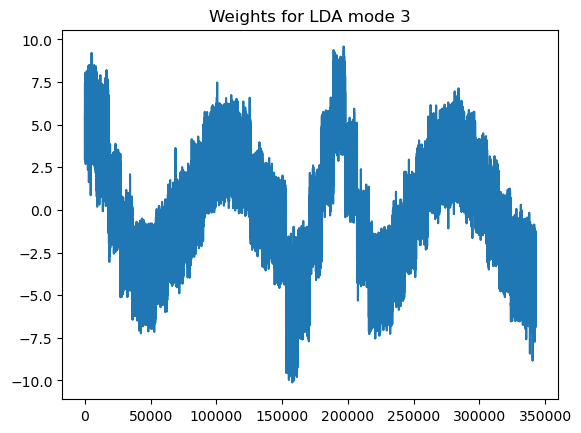

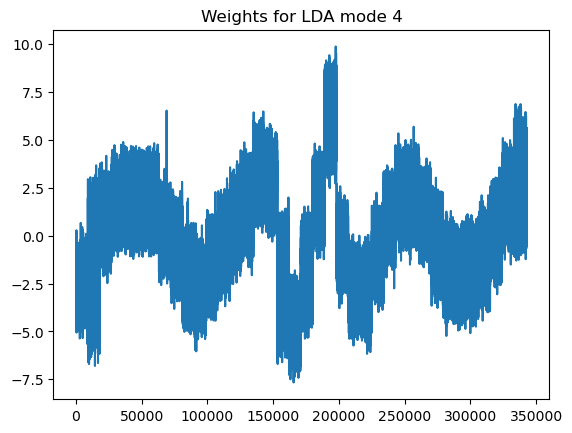

In [18]:


#plot the modes
for i in range(n_comps):
    plt.plot(x_label, lda_.scalings_[:, i], '-');
    plt.title('LDA mode {} over all data'.format(i))
    plt.show()


# transform X data to compute weights
X_transform = lda_.transform(X)

# plot the weights
for i in range(n_comps):
    plt.plot(X_transform[:, i]);
    plt.title('Weights for LDA mode {}'.format(i))
    plt.show()



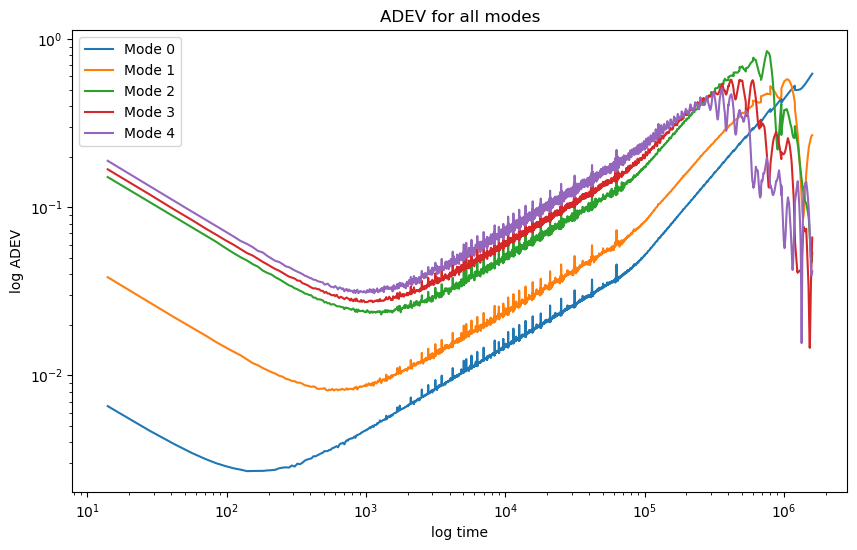

In [19]:
# tack on a code for ADEV

# Create a figure before starting the loop
plt.figure(figsize=(10, 6))

for j in range(n_comps):
    # Normalize amplitude
    yd = X_transform[:, j] / X_transform[:, j][0]
    
    # Calculate ADEV
    t = np.logspace(0, 10, 100)
    r = 1 / 14  # sample rate
    t2, ad, ade, adn = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    
    # Plot ADEV for each mode (overlayed)
    plt.loglog(t2, ad, label=f'Mode {j}')  # Add label for legend

# Add title, labels, and legend
plt.title('ADEV for all modes')
plt.xlabel('log time')
plt.ylabel('log ADEV')
plt.legend()

# Show the final plot
plt.show()


In [20]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
lda_t = LinearDiscriminantAnalysis(n_components=n_comps)

# Fit the LDA model
lda_t.fit(X_train, y_train) 

#transform X_train data
X_train_transform = lda_t.transform(X_train)

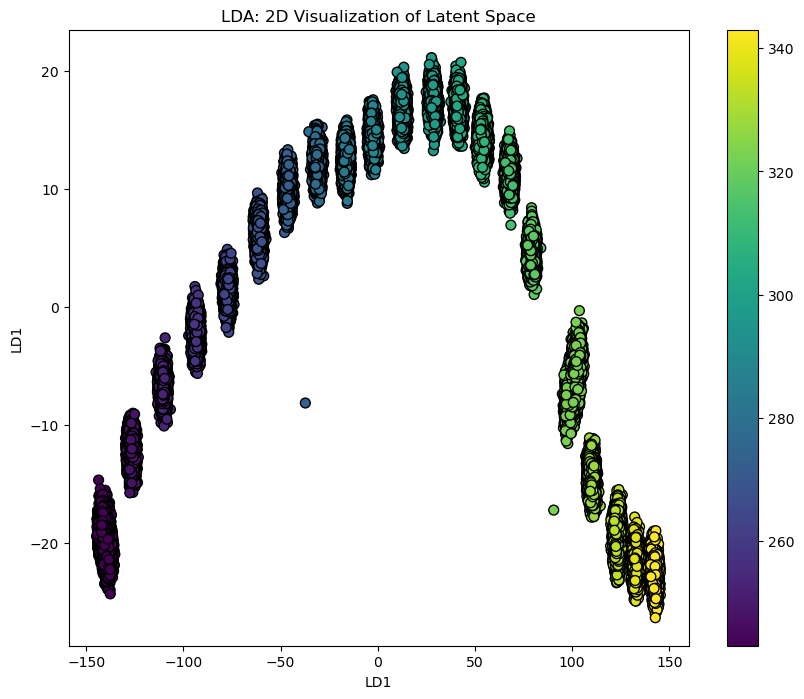

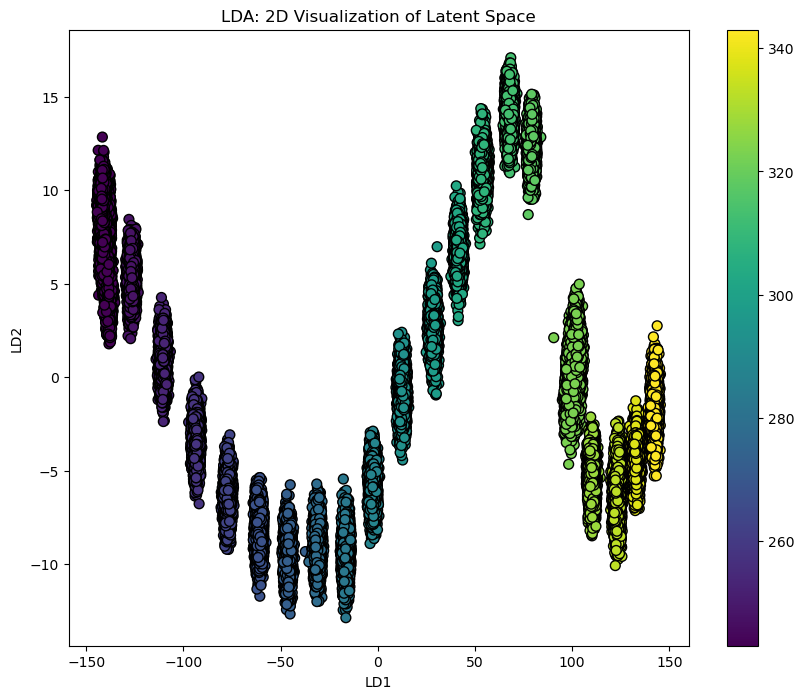

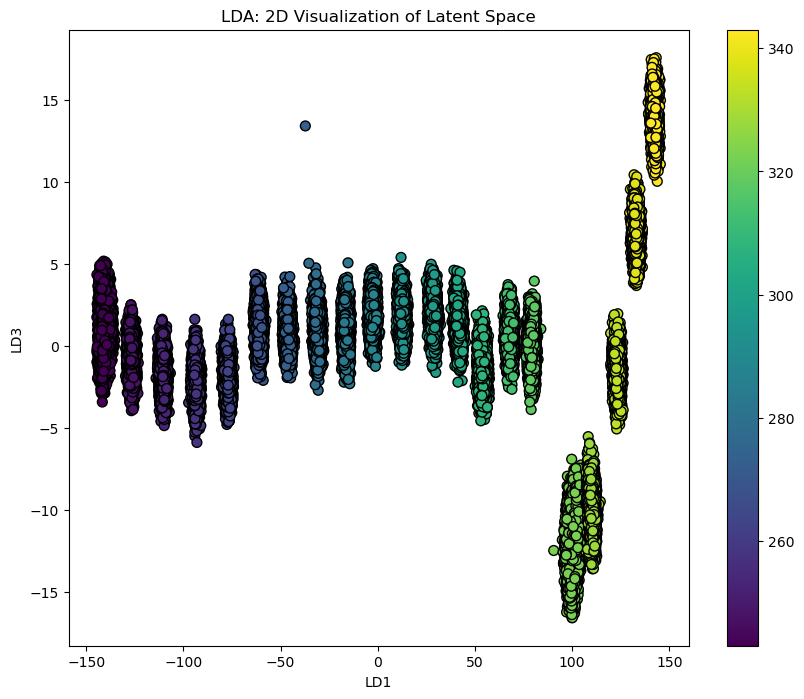

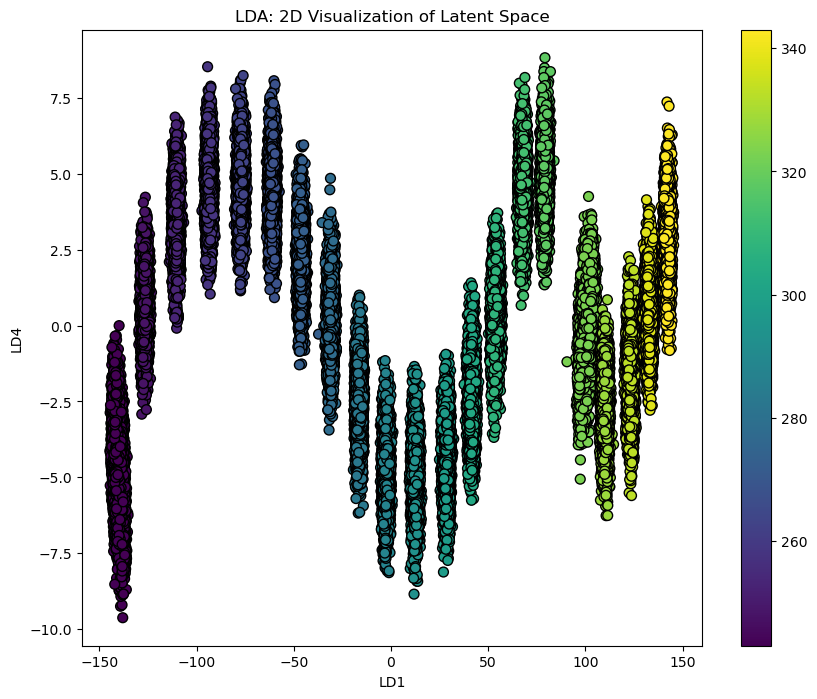

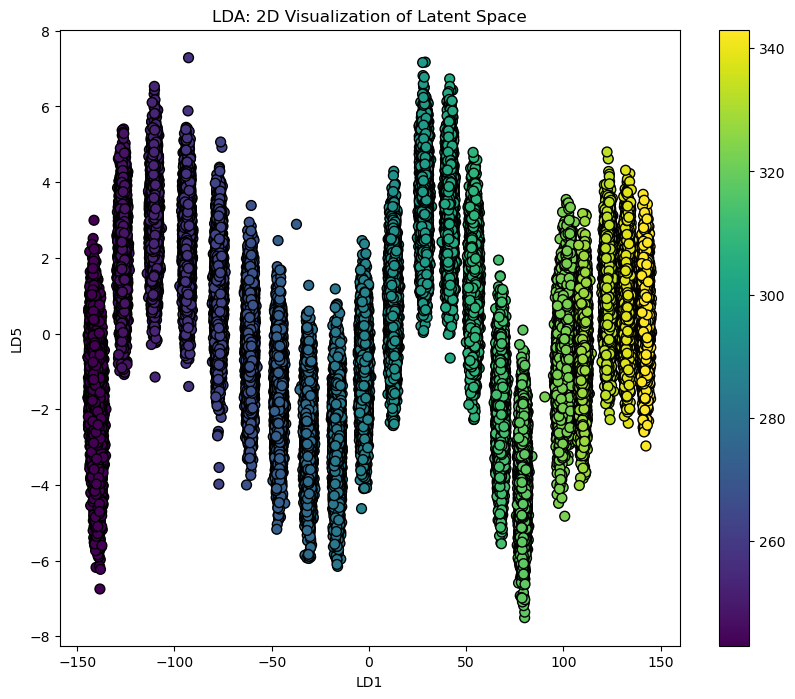

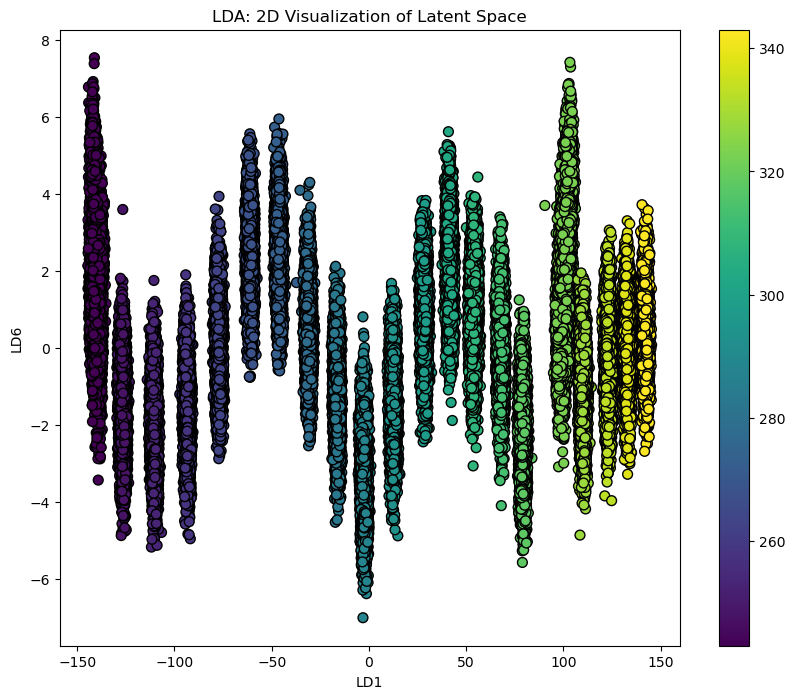

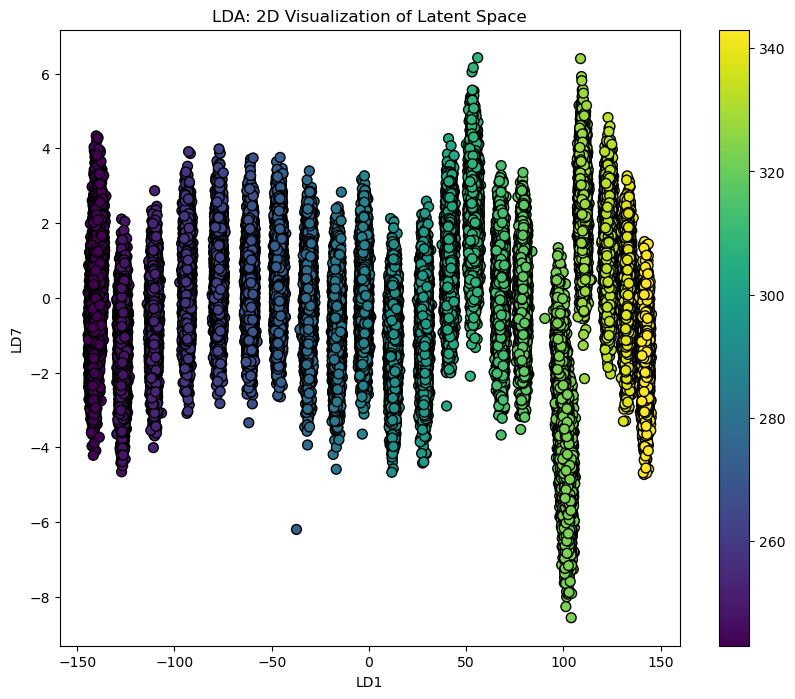

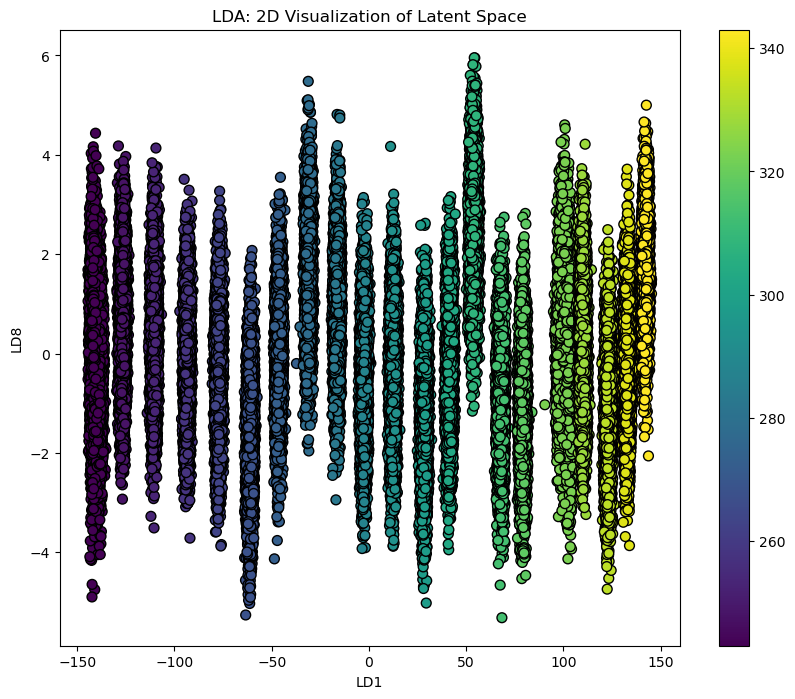

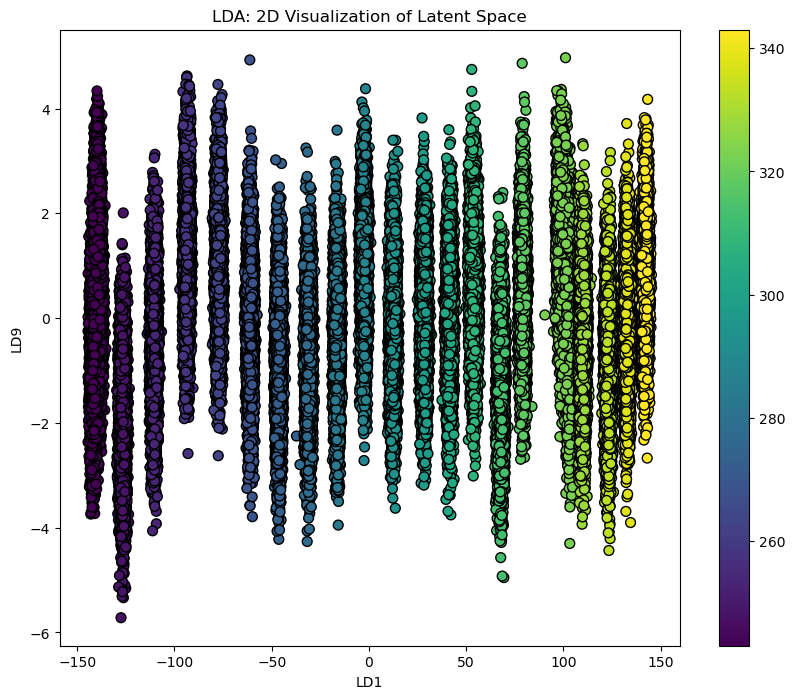

In [21]:
# plot components against each other
for i in range(n_comps):
    if i ==0:
        pass
    else:
        plt.figure(figsize=(10, 8))
        plt.scatter(X_train_transform[:, 0], X_train_transform[:, i], c=y_train, cmap='viridis', edgecolors='k', s=50)
        plt.colorbar()  # To show the color scale corresponding to the classes
        plt.xlabel('LD1')
        plt.ylabel('LD{}'.format(i))
        plt.title('LDA: 2D Visualization of Latent Space')
        plt.show()






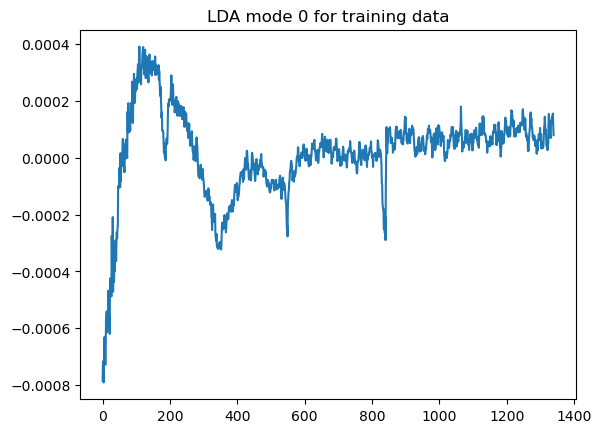

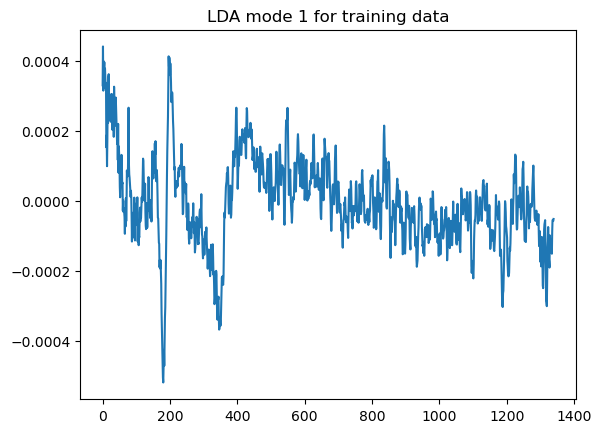

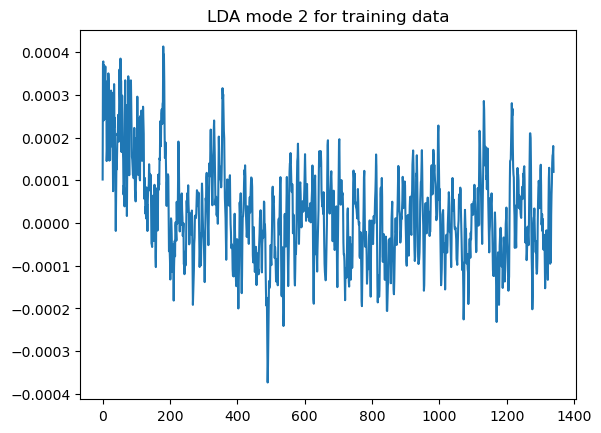

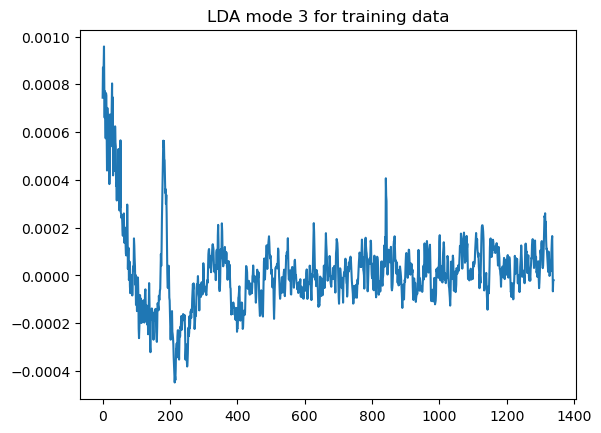

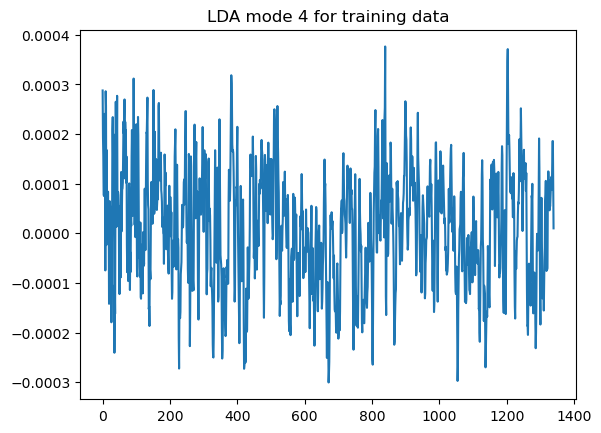

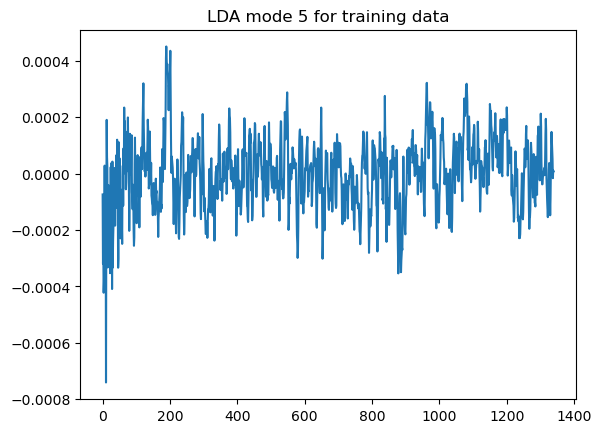

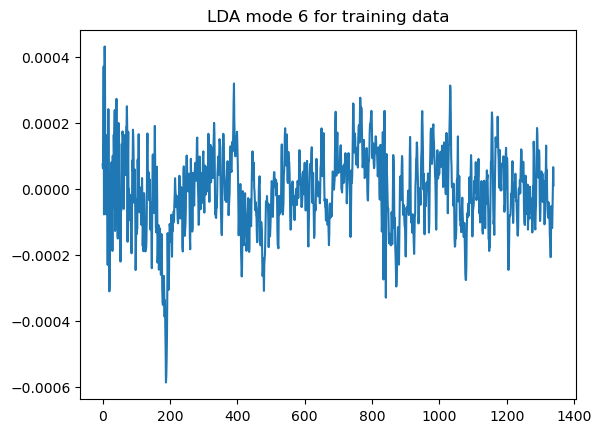

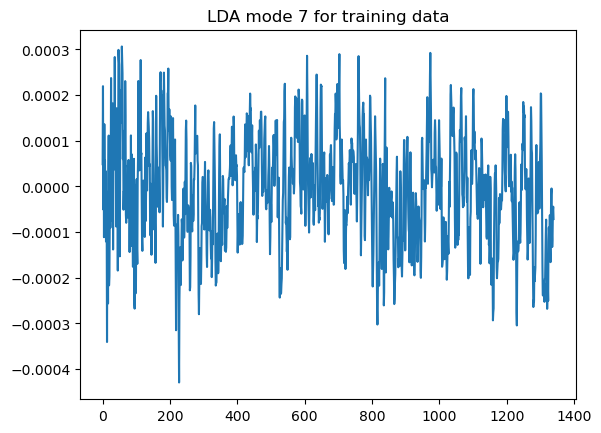

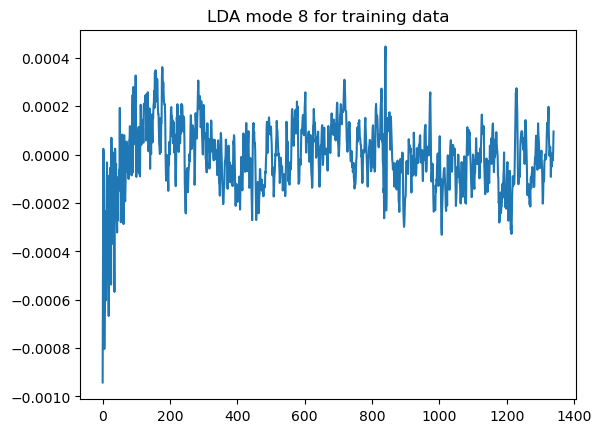

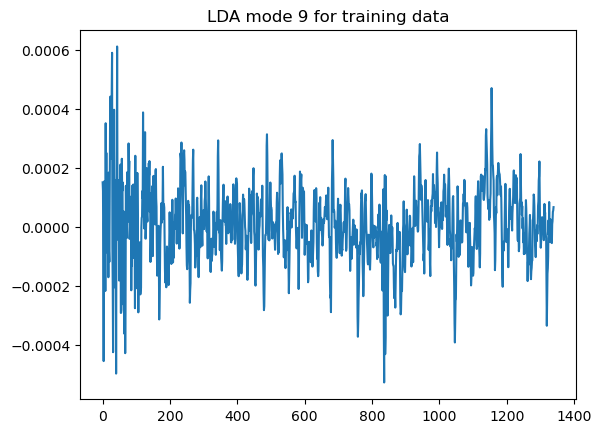

In [22]:
for i in range(n_comps):
    plt.plot(lda_t.scalings_[:, i]); 
    plt.title('LDA mode {} for training data'.format(i) )
    plt.show()

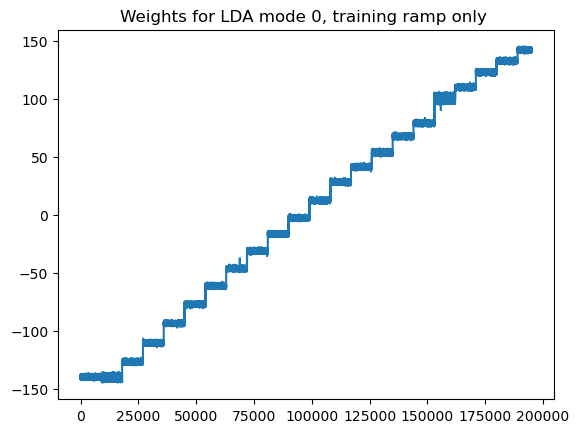

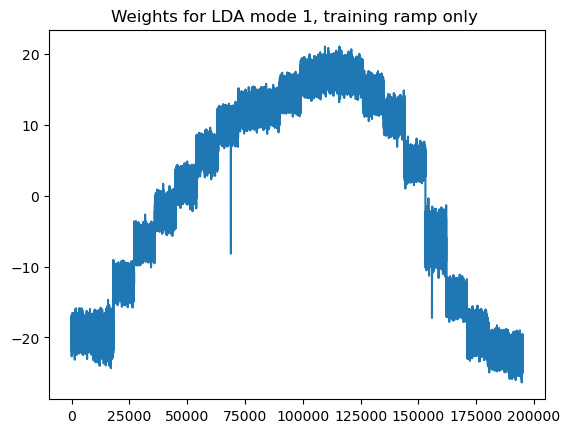

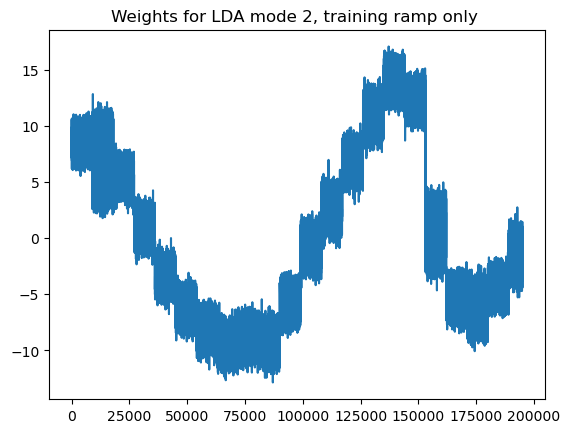

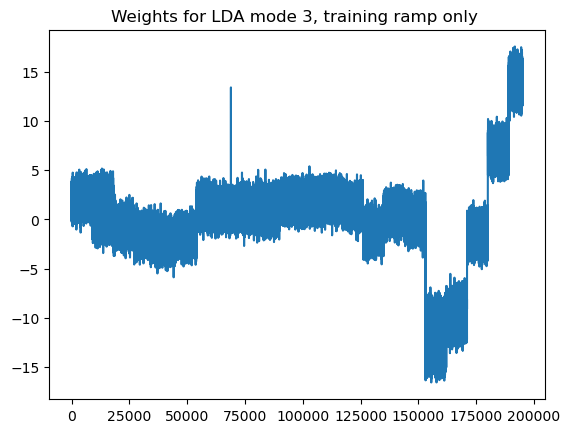

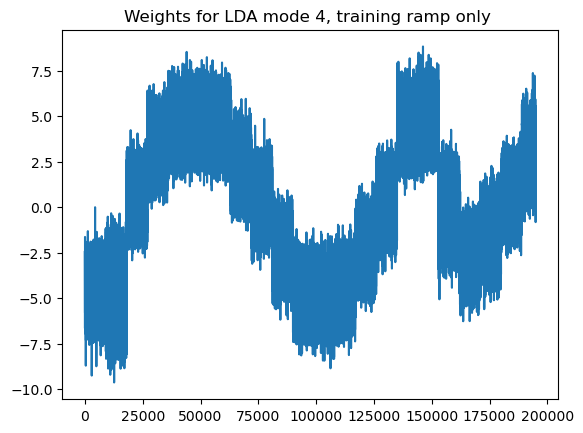

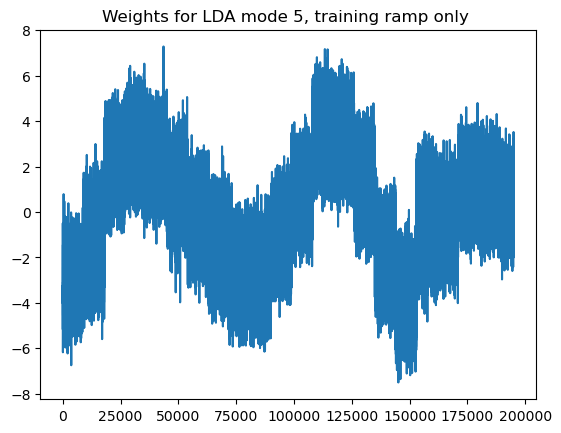

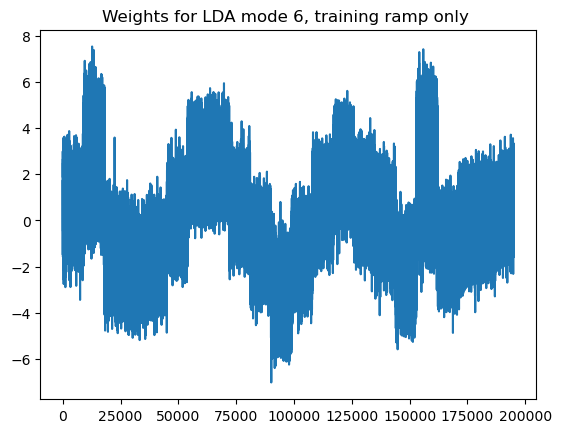

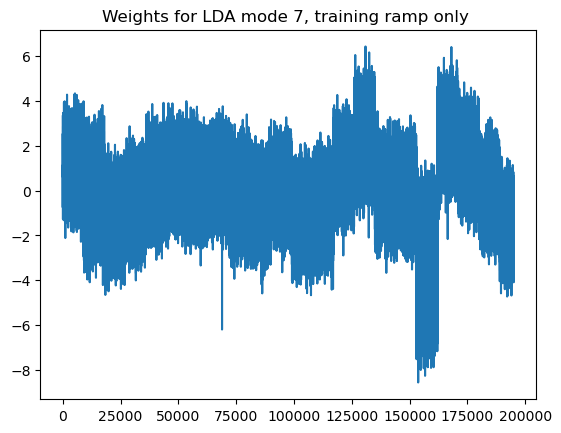

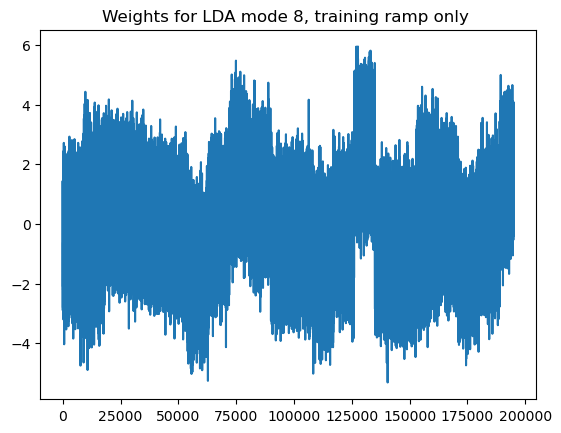

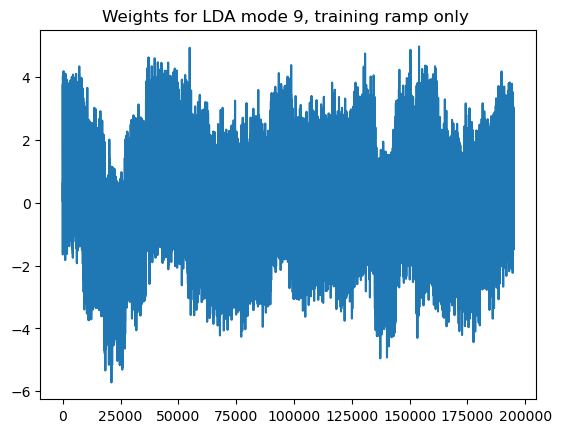

In [23]:
for i in range(n_comps):
    plt.plot(X_train_transform[:, i]);
    plt.title('Weights for LDA mode {}, training ramp only '.format(i))
    plt.show()

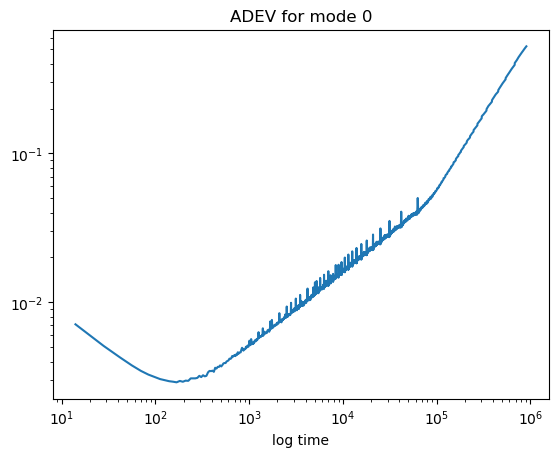

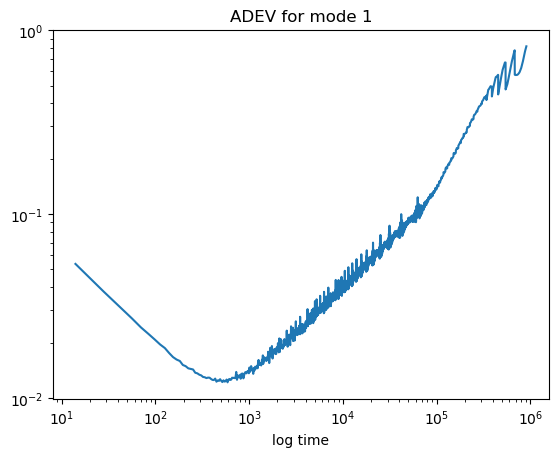

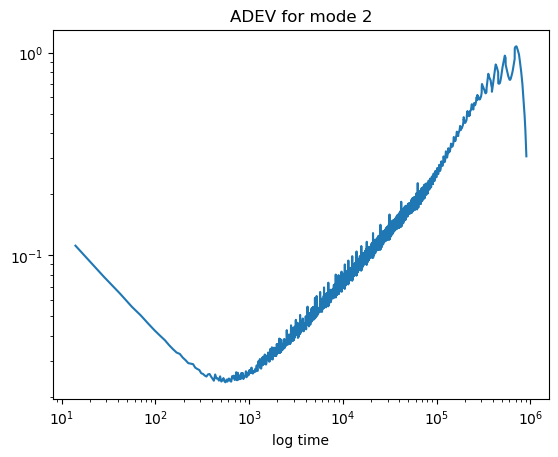

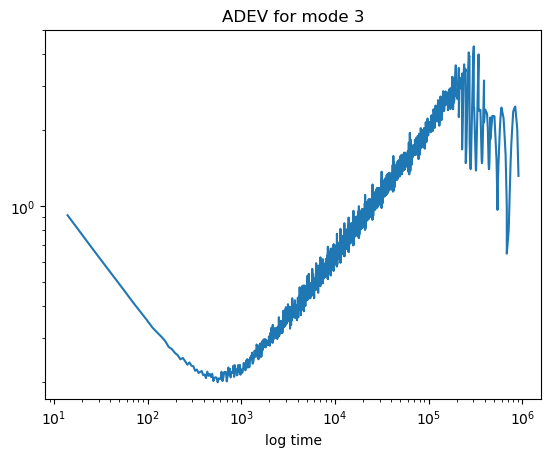

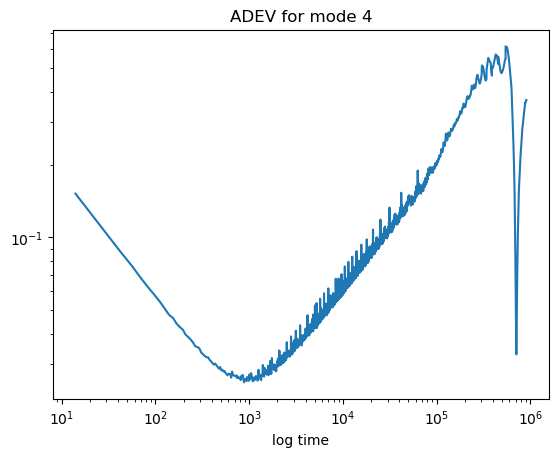

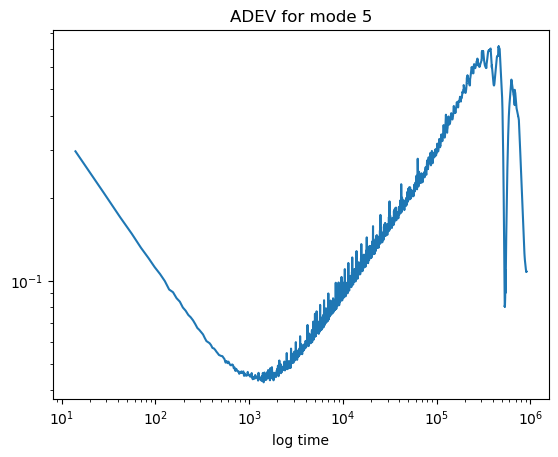

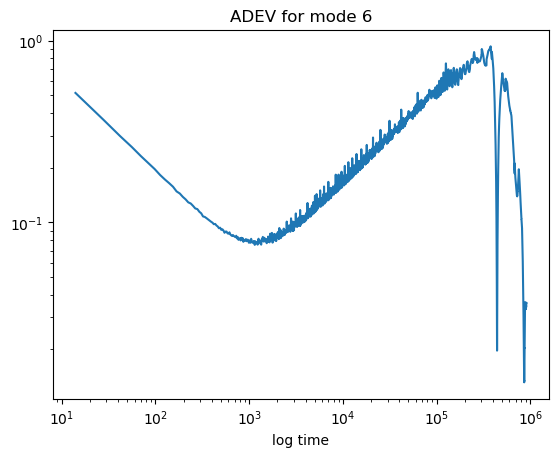

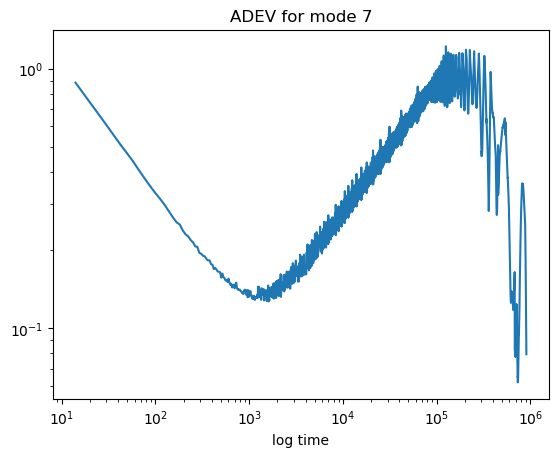

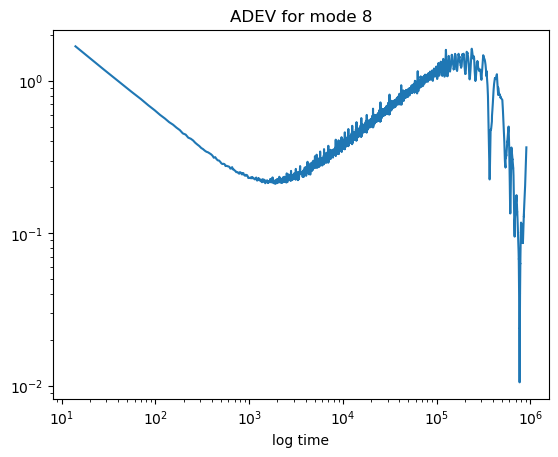

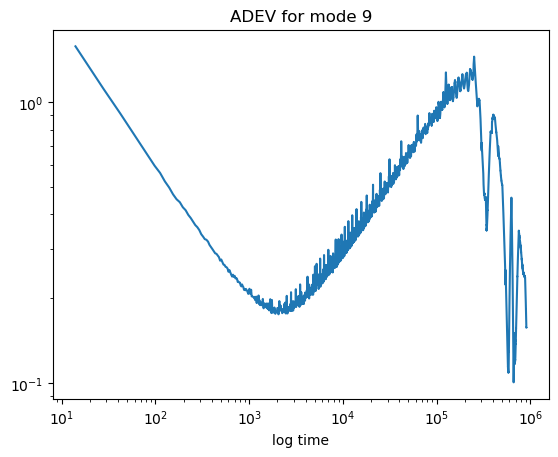

<Figure size 640x480 with 0 Axes>

In [24]:
# tack on a code for ADEV

for j in range(n_comps):
    ### amplitude
    yd =  X_train_transform[:, j]/ X_train_transform[:, j][0]  
    #plt.plot(yd);    
    #plt.title('normalized loading for mode {}'.format(j)) #after subtracting top 3 modes
    #plt.show()
    t= np.logspace(0,10,100)
    r=1/14 # sample rate
    (t2, ad, ade, adn) = allantools.adev(yd, rate=r, data_type="freq", taus='all')
    fig = plt.loglog(t2, ad)
    plt.title('ADEV for mode {}'.format(j))
    plt.xlabel('log time')
    plt.figure()

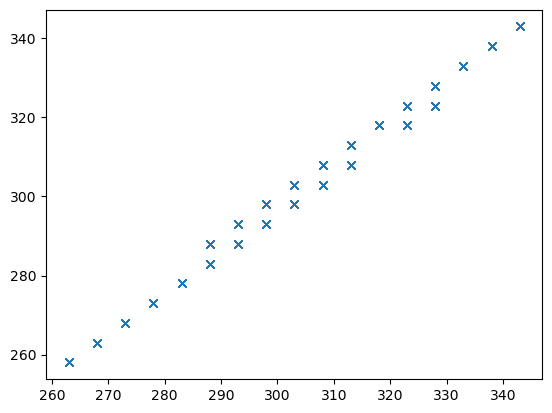

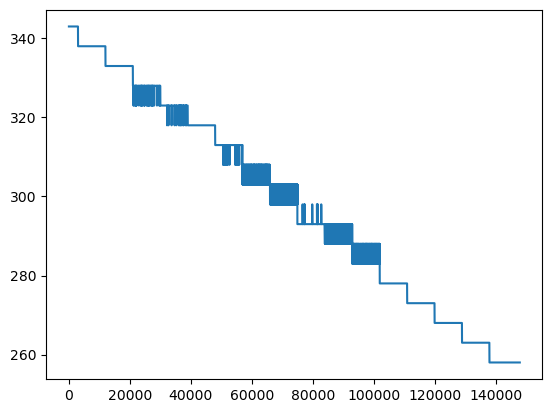

In [25]:
y_pred_test=lda_t.predict(X_test)


plt.plot(y_test.values, y_pred_test, 'x');plt.show()

plt.plot(y_pred_test)

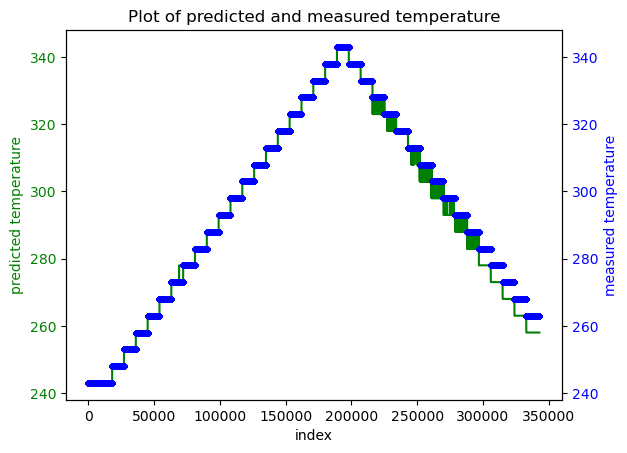

In [26]:
y_pred=lda_t.predict(X)


# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot y1 with respect to the left y-axis
ax1.plot(y_pred, 'g-', label='y1')  # 'g-' is for green line
ax1.set_xlabel('index')  # x-axis label
ax1.set_ylabel('predicted temperature', color='g')  # left y-axis label
ax1.tick_params(axis='y', labelcolor='g')  # Set color for left y-axis ticks

# Create the second y-axis (on the right side)
ax2 = ax1.twinx()

# Plot y2 with respect to the right y-axis
ax2.plot( y, 'b.', label='y2')  # 'b-' is for blue line
ax2.set_ylabel('measured temperature', color='b')  # right y-axis label
ax2.tick_params(axis='y', labelcolor='b')  # Set color for right y-axis ticks

# Title for the entire plot
plt.title('Plot of predicted and measured temperature')

# Show the plot
plt.show()




#plt.plot( y_pred, 'x');plt.show()
#plt.plot(y.values, y_pred, 'x')

In [27]:
export_name = '../saved_data/sensor_2_week_1_first_cycle_eigenmode_{}.png'

In [28]:
n_comps = 3
components = []

def plot_components(lda_d, start, n_comps):
    for i in range(n_comps):
        plt.plot(lda_d.scalings_[:, i])
        plt.title(f'Starting time step {start}')
        plt.legend([f'component {i+1}'])
        plt.show()

def dynamic_lda(data, y, window_size=10000):
    lda_d = LinearDiscriminantAnalysis(n_components=n_comps)
    
    for start in range(0, data.shape[0] - window_size + 1, window_size):
        if start == 0:
            print(start)
            window = data.iloc[start:start + window_size*3, :]
            y_ = y[start:start + window_size*3]
            lda_d.fit(window, y_)
            win_transformed = lda_d.transform(window)
            components.append(lda_d.coef_)
            plot_components(lda_d, start, n_comps)
            plt.plot(win_transformed[:, 0])
            plt.title(f'Weights for first modes trained on { window_size} time step starting from {start}')
            plt.show()
            plt.plot(win_transformed[:, 1])
            plt.plot(win_transformed[:, 2])
            plt.title(f'Weights for modes trained on {window_size} time step starting from {start}')
            plt.show()
        elif (start + window_size*3) < data.shape[0] and len(set(y[start:start + window_size*3])) < n_comps:
            print(f'Not enough unique classes for {start}')
            break
        else:
            print(start)
            window = data.iloc[start:start + window_size*3, :]
            y_ = y[start:start + window_size*3]
            lda_d.fit(window, y_)
            win_transformed = lda_d.transform(window)
            components.append(lda_d.coef_)
            plot_components(lda_d, start, n_comps)
            plt.plot(win_transformed[:, 0])
            plt.show()
            plt.plot(win_transformed[:, 1])
            plt.plot(win_transformed[:, 2])
            plt.title(f'Weights for modes trained on {window_size} time step starting from {start}')
            plt.show()


0


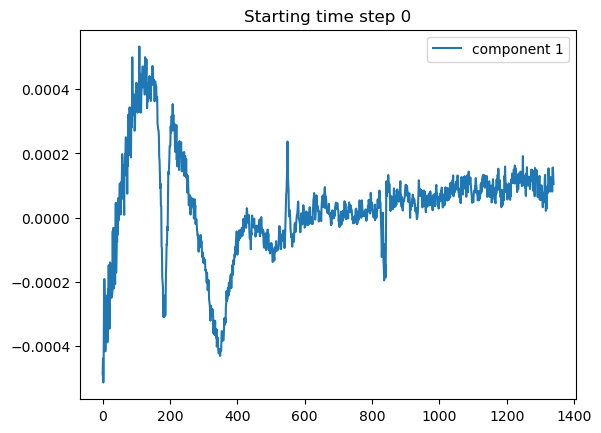

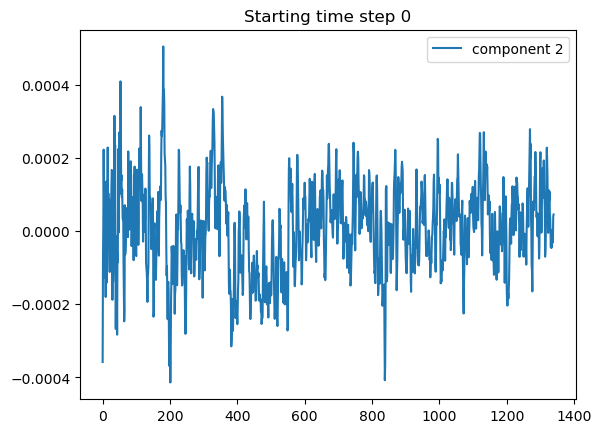

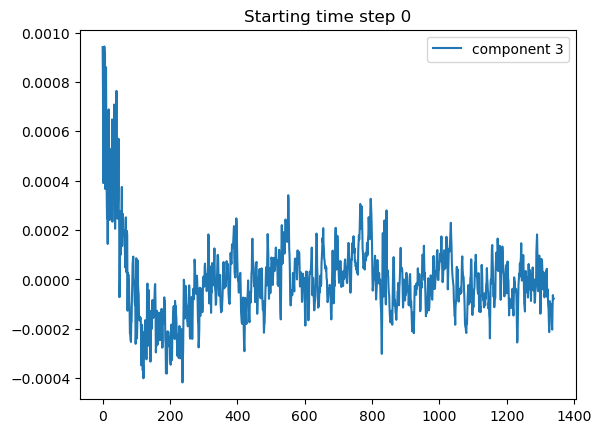

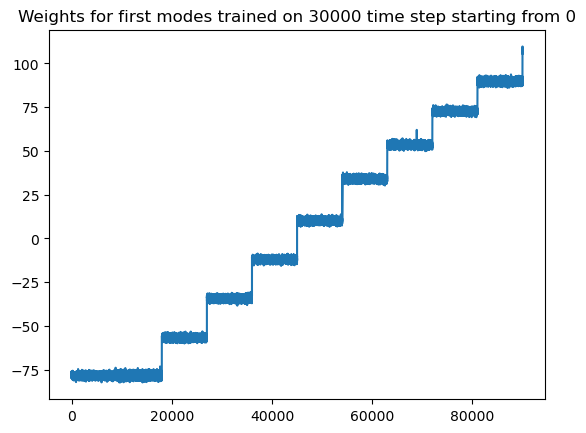

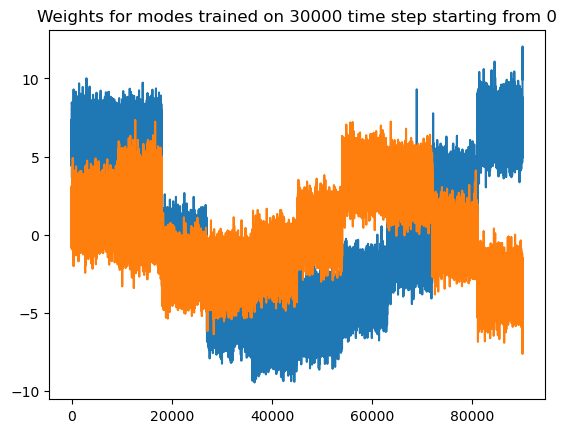

30000


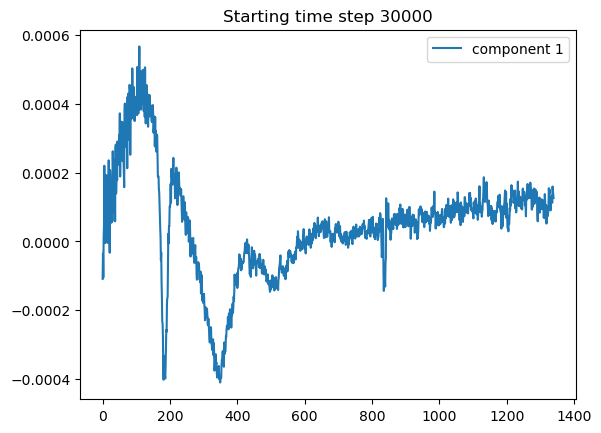

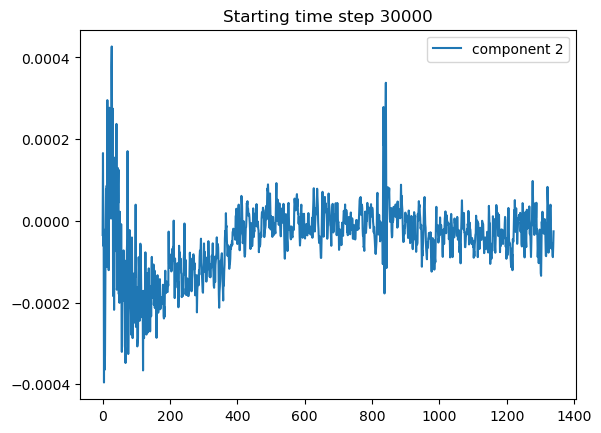

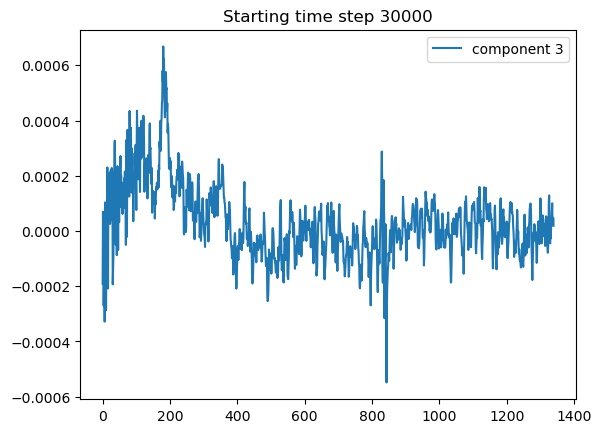

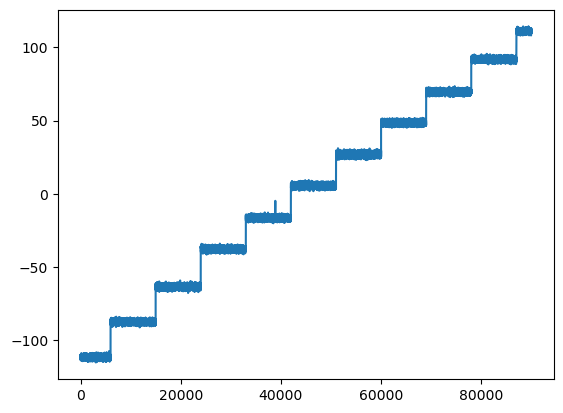

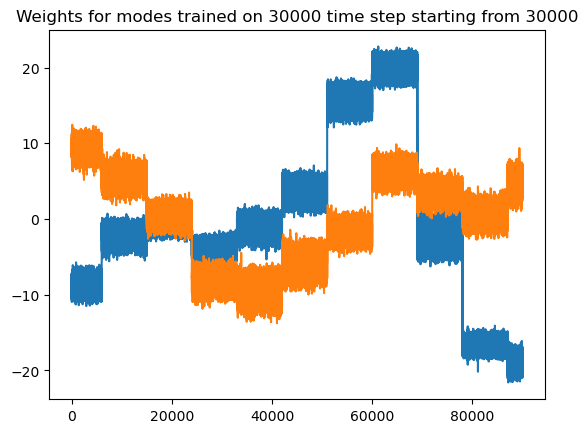

60000


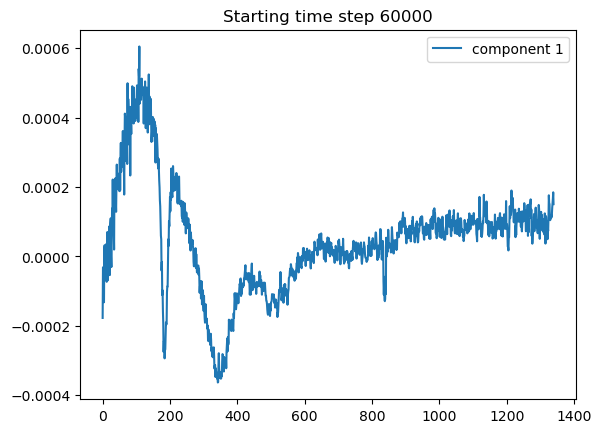

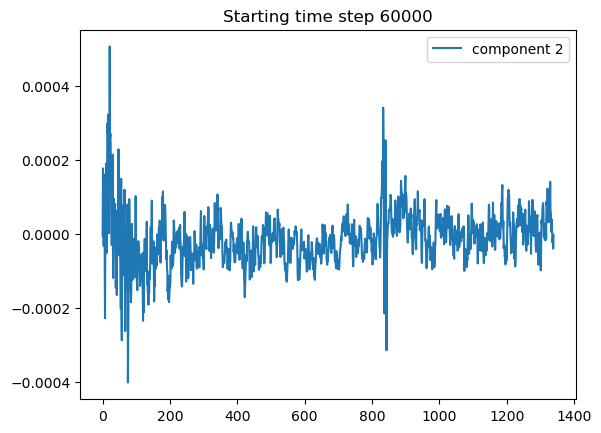

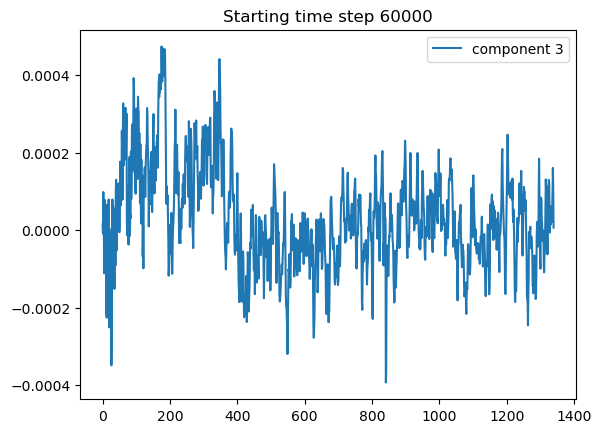

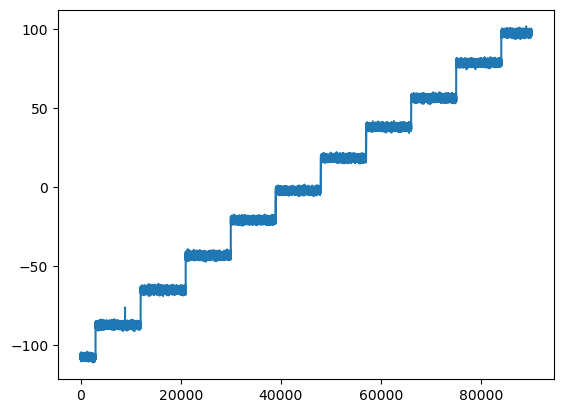

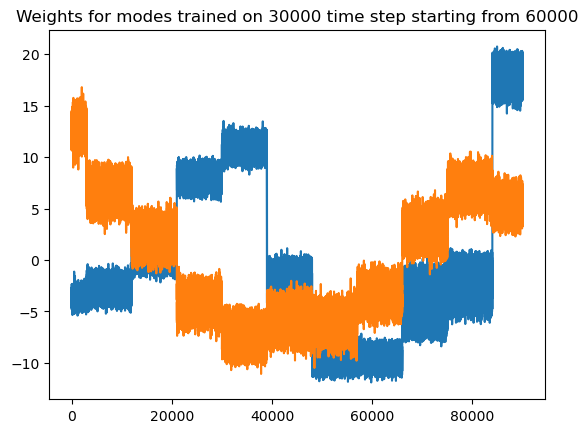

90000


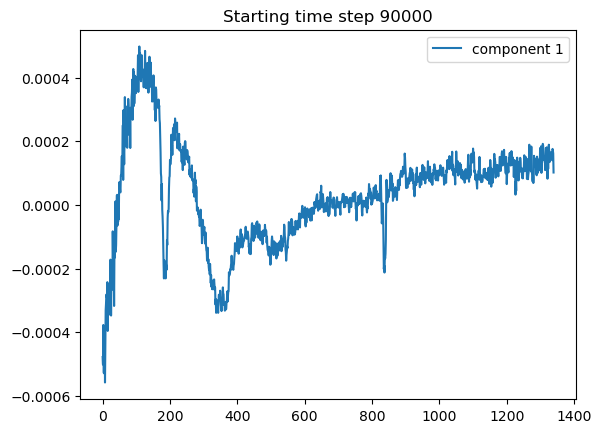

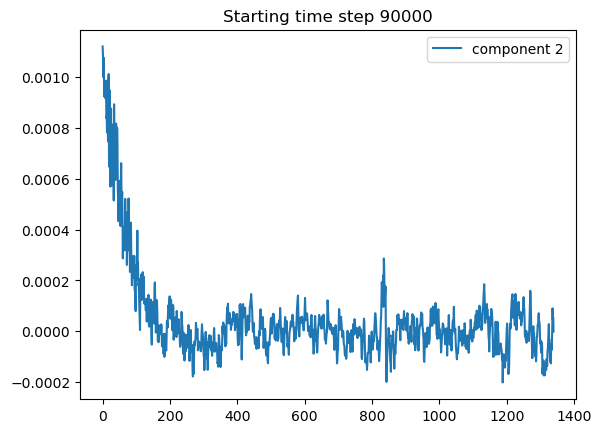

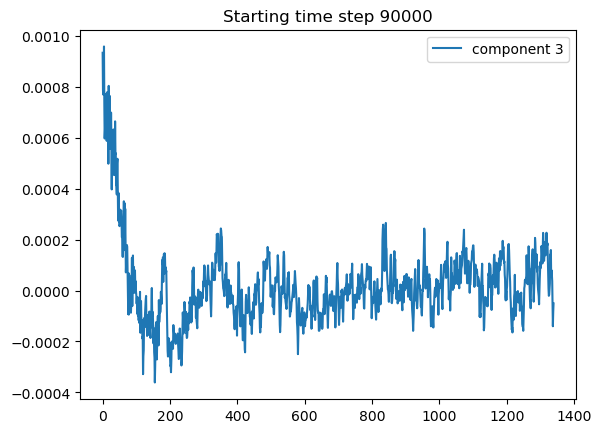

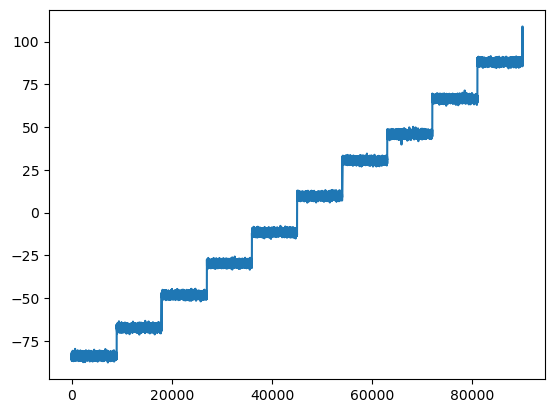

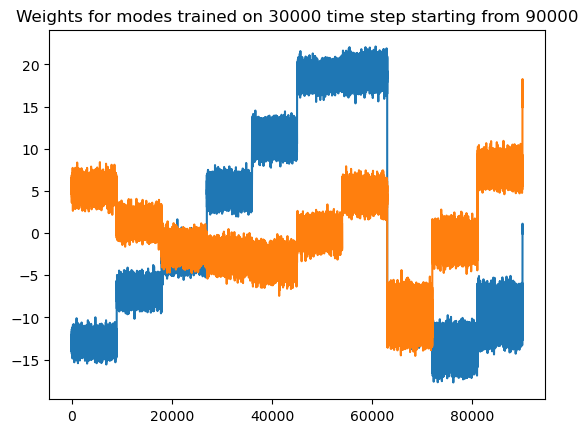

120000


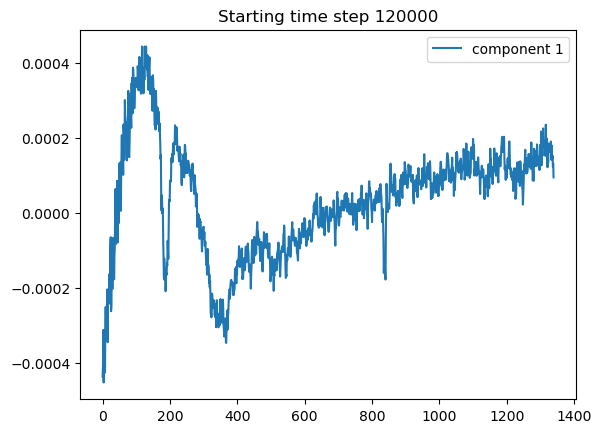

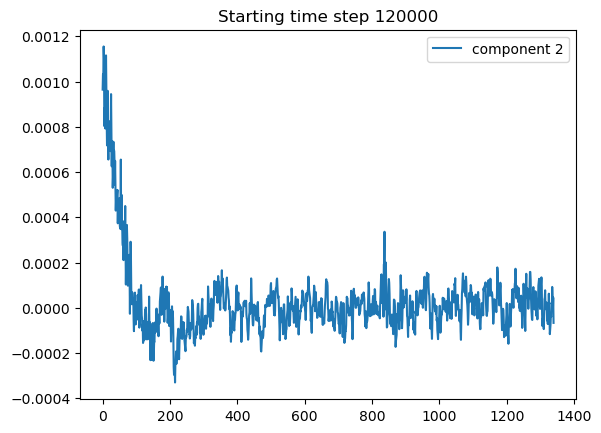

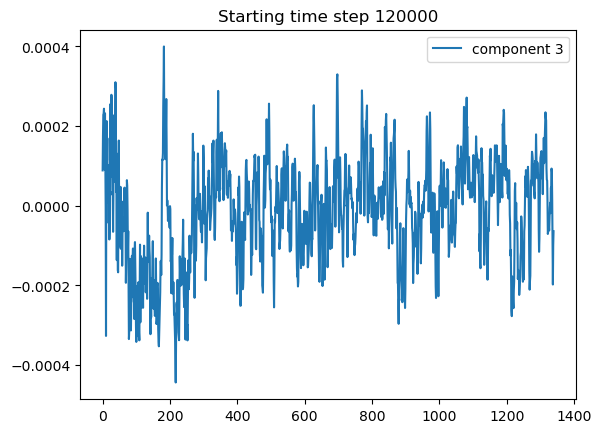

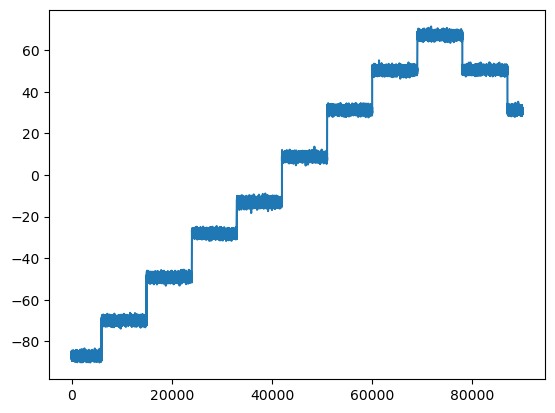

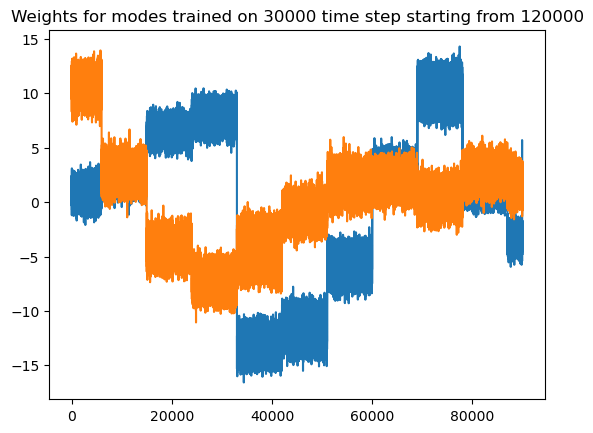

150000


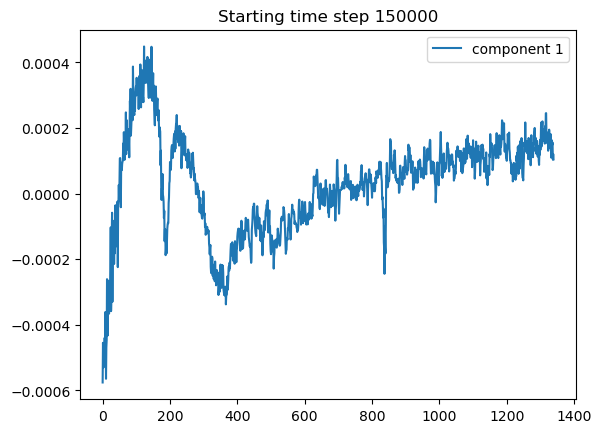

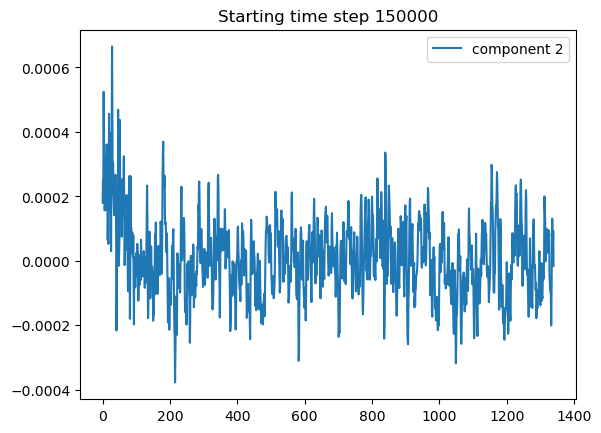

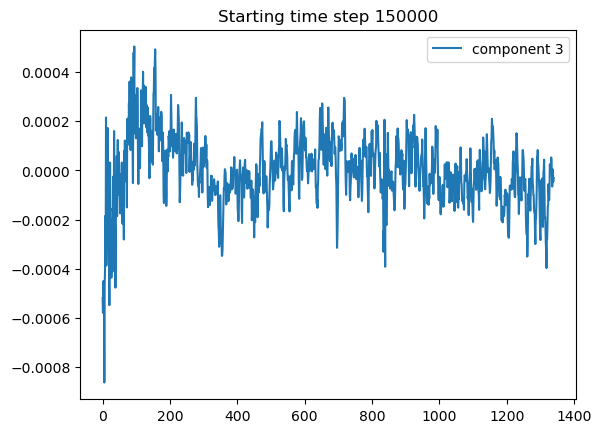

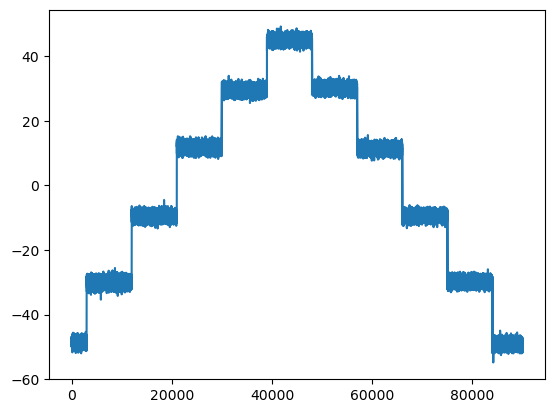

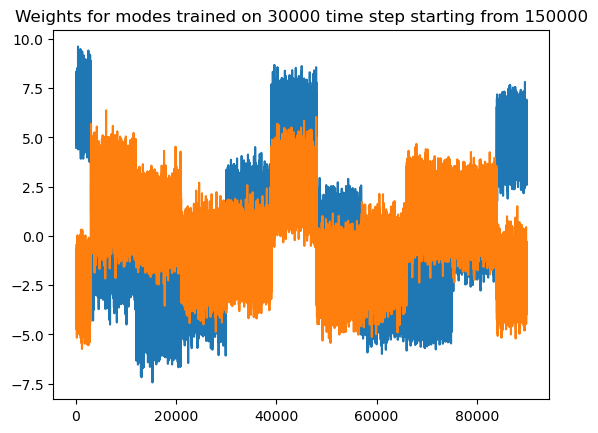

180000


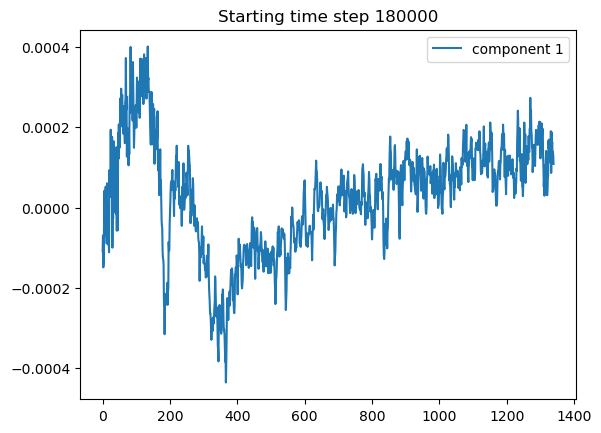

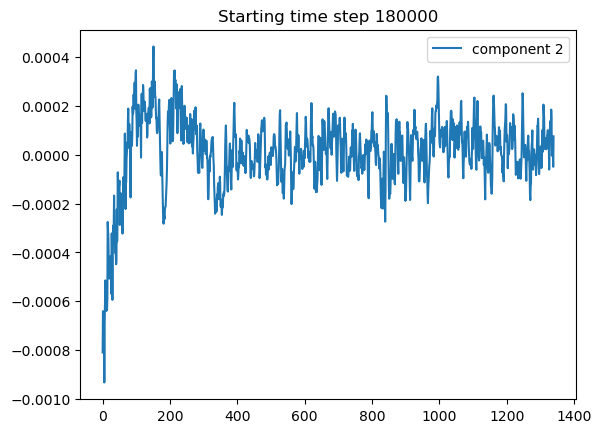

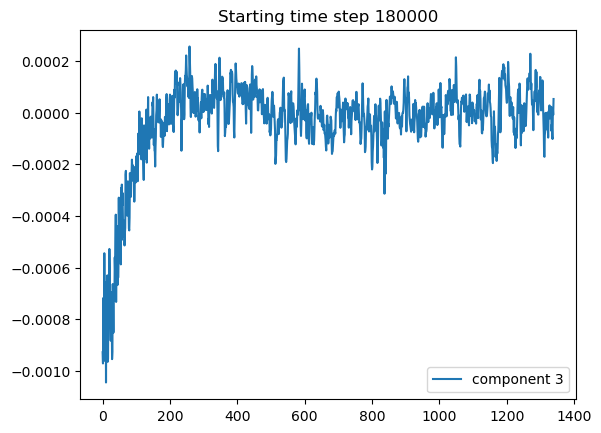

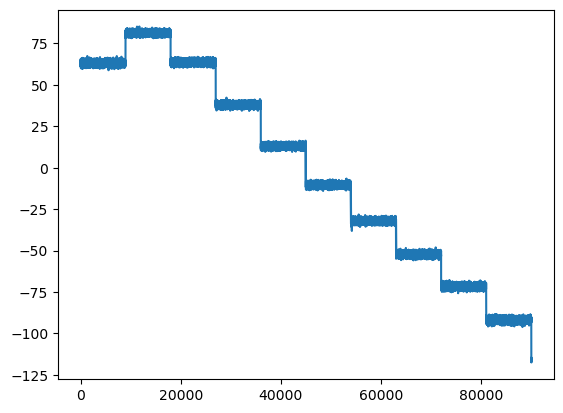

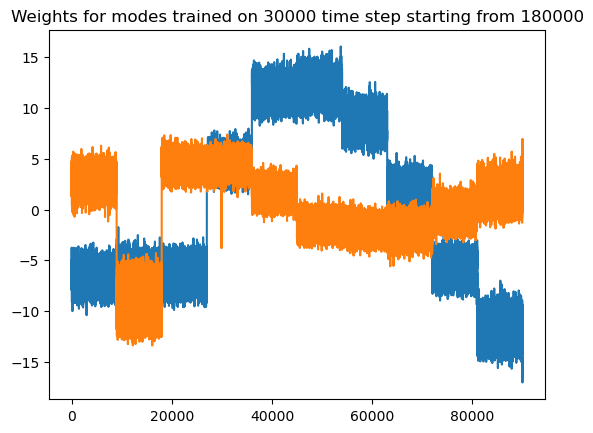

210000


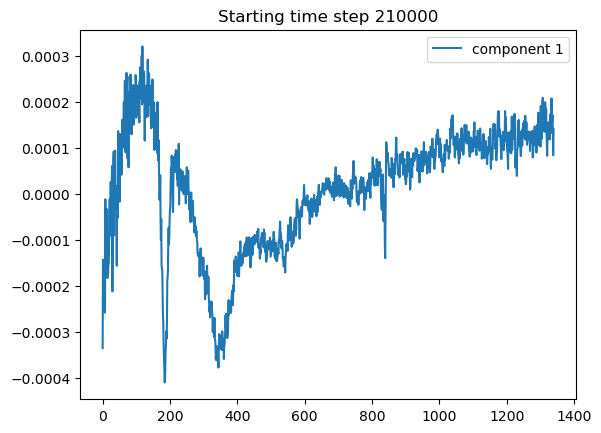

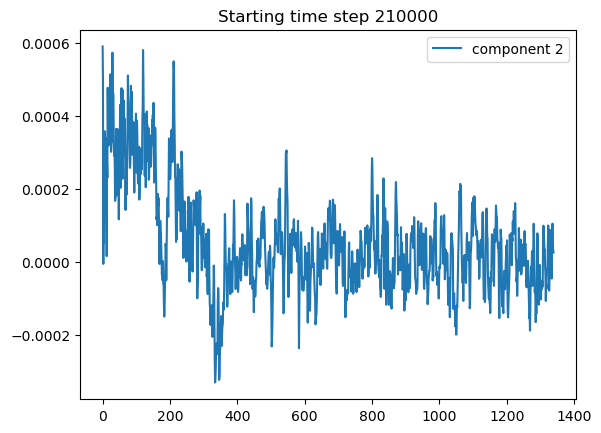

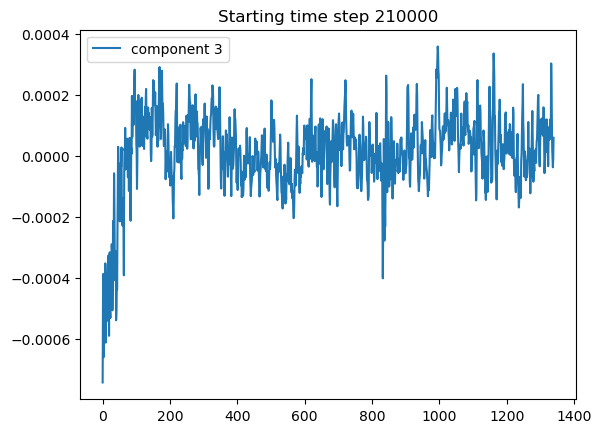

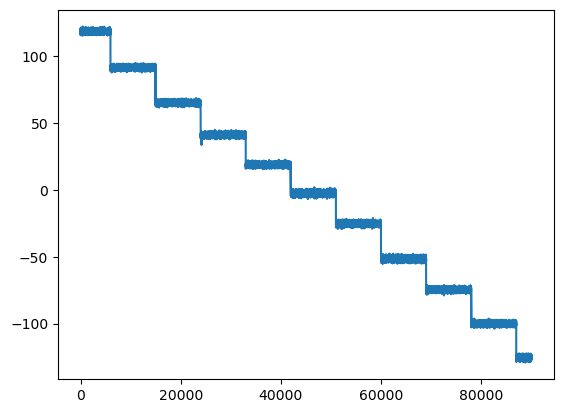

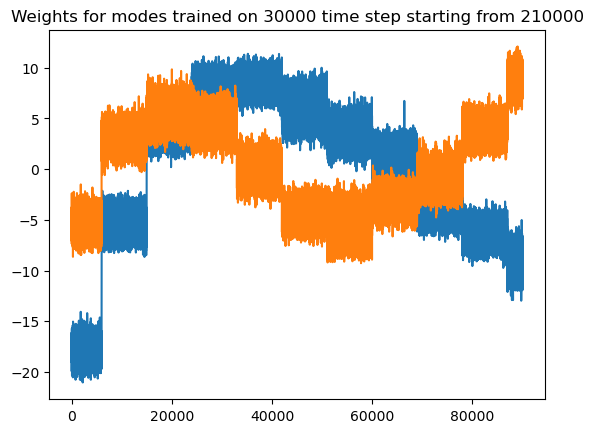

240000


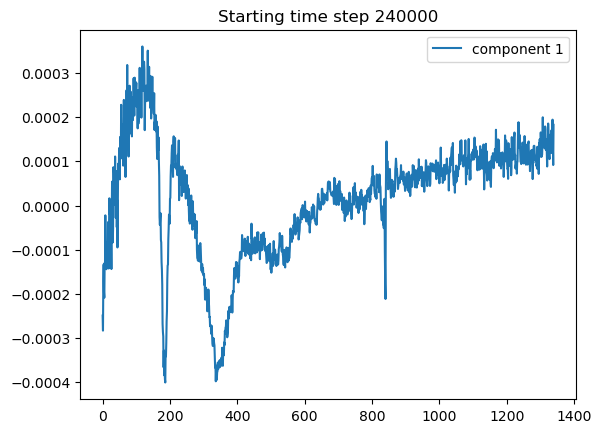

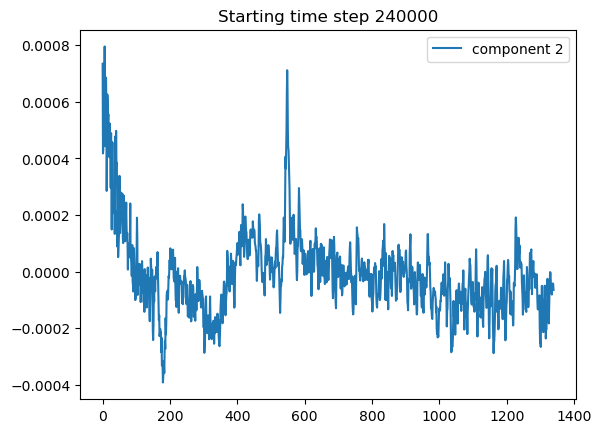

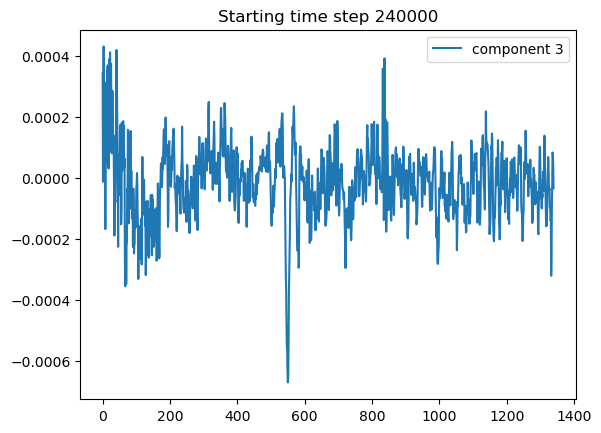

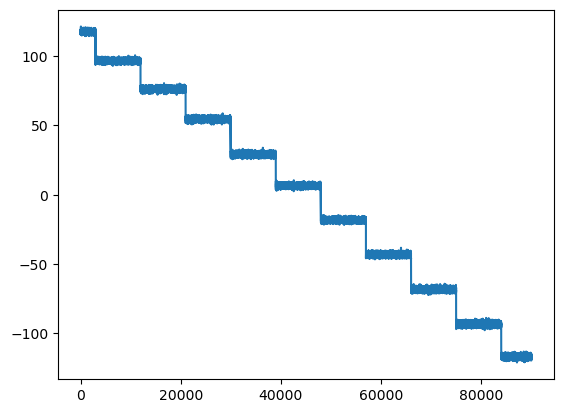

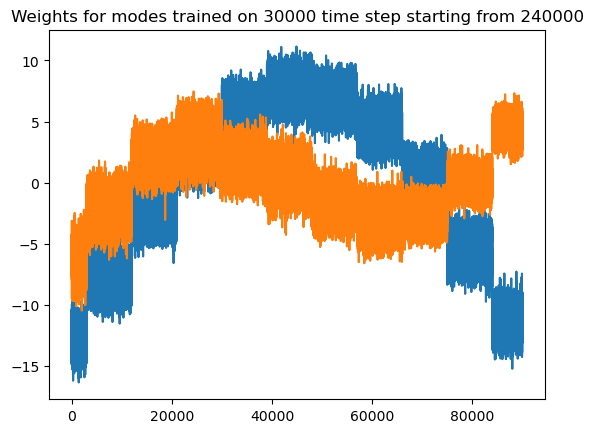

270000


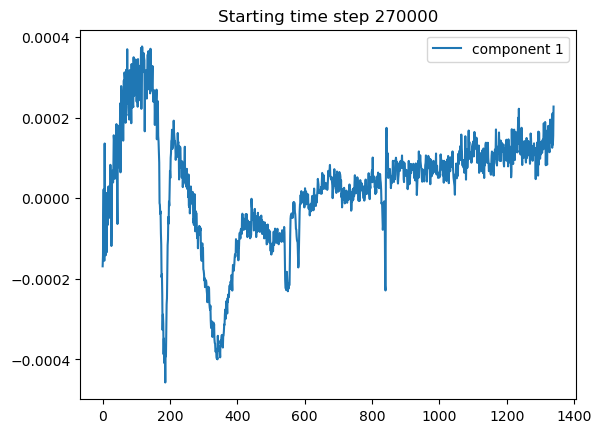

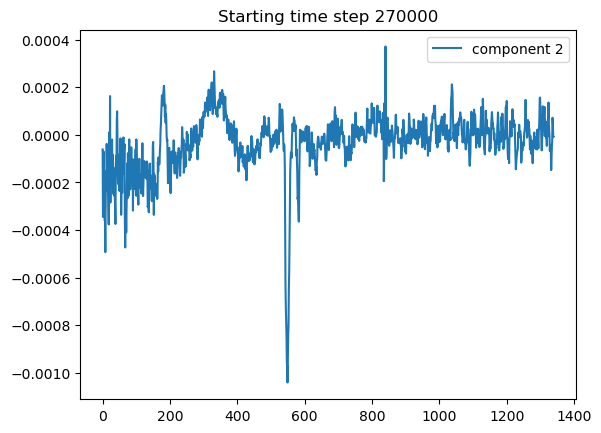

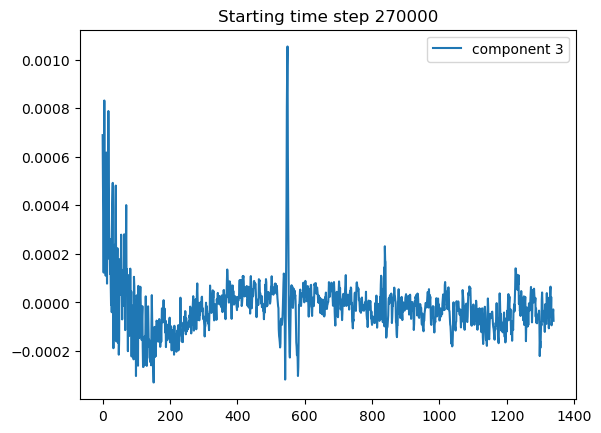

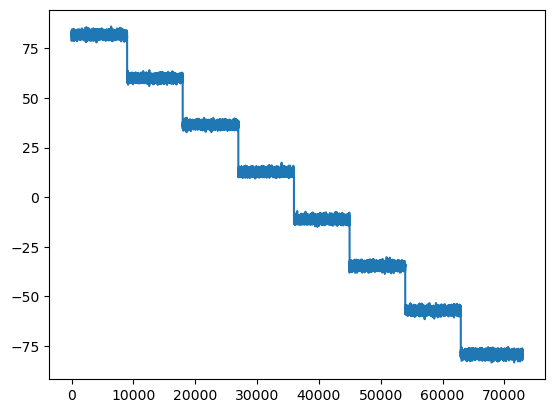

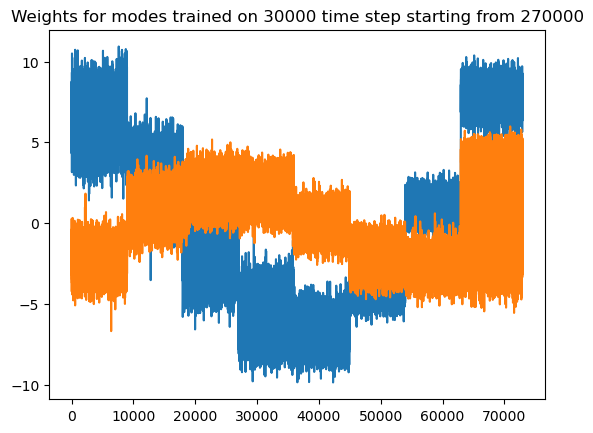

300000


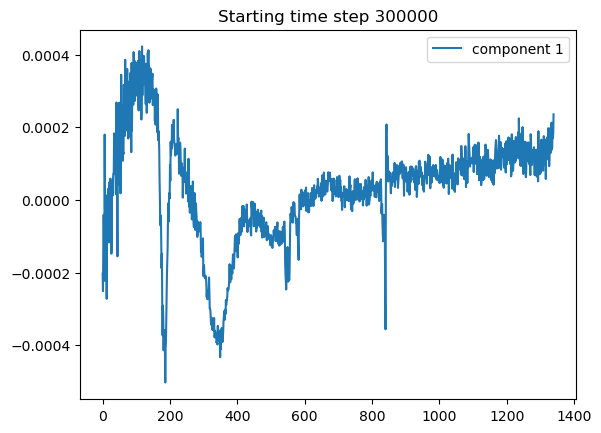

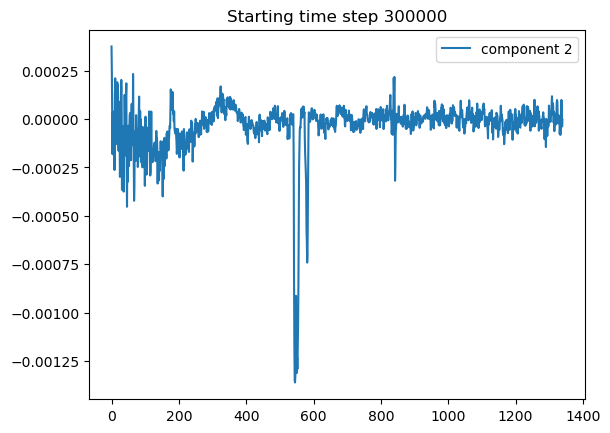

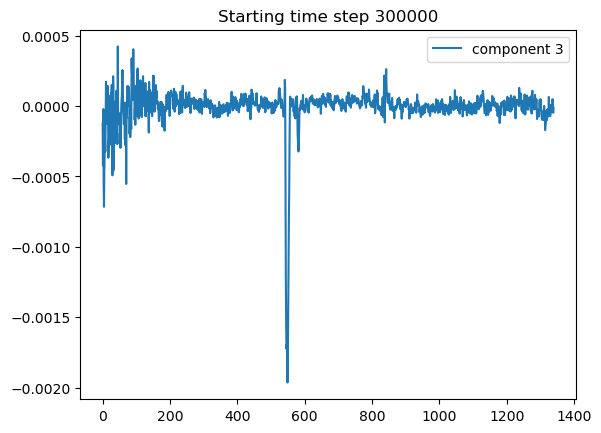

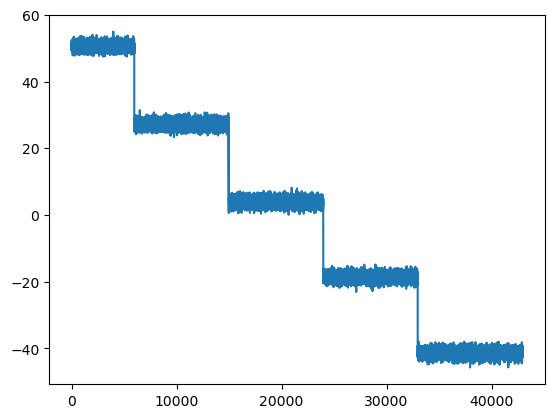

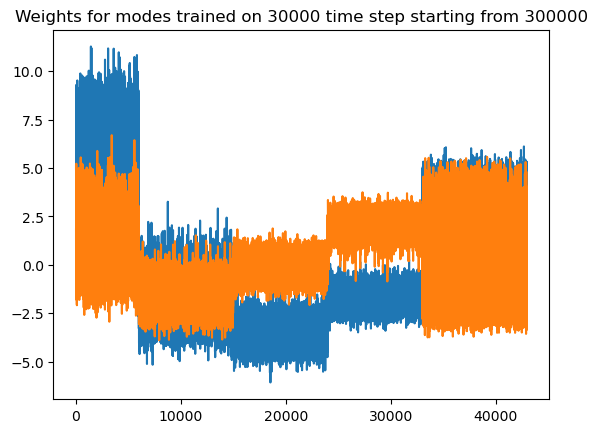

In [29]:
dynamic_lda(X, y,window_size=30000)  #10000

test
0


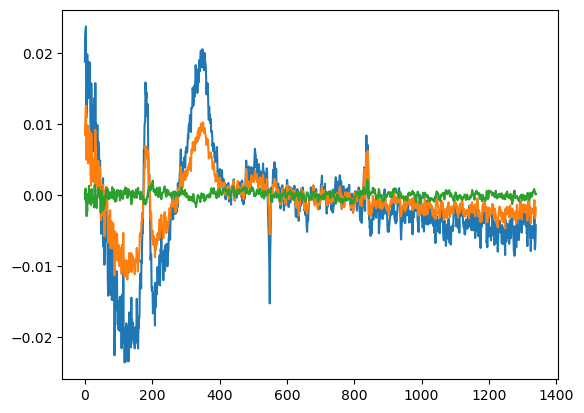

20000


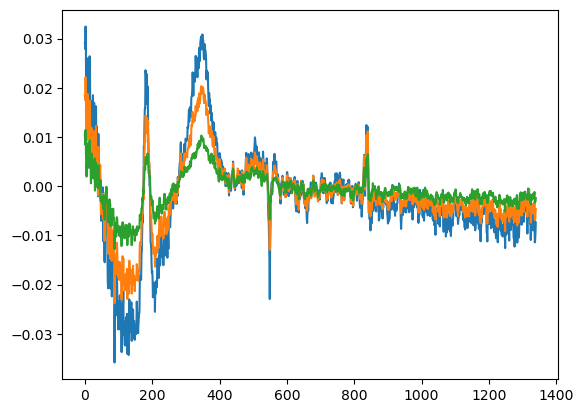

40000


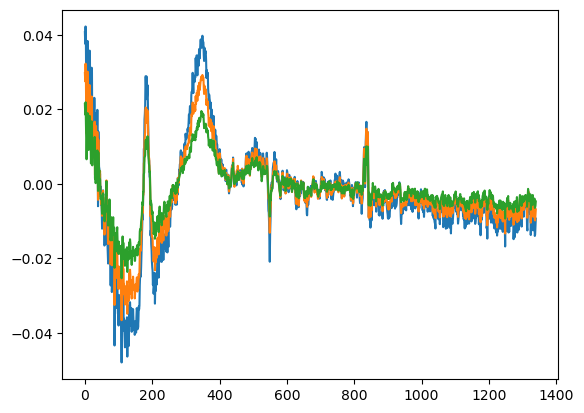

60000


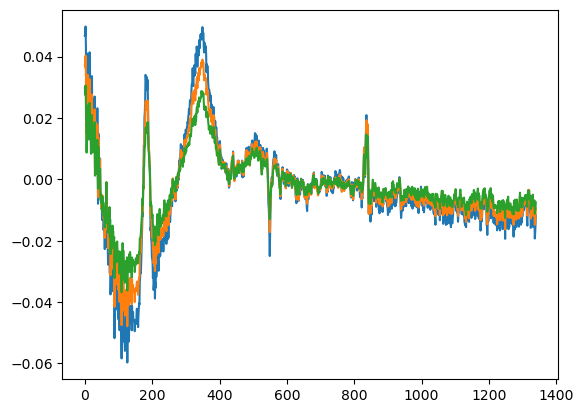

80000


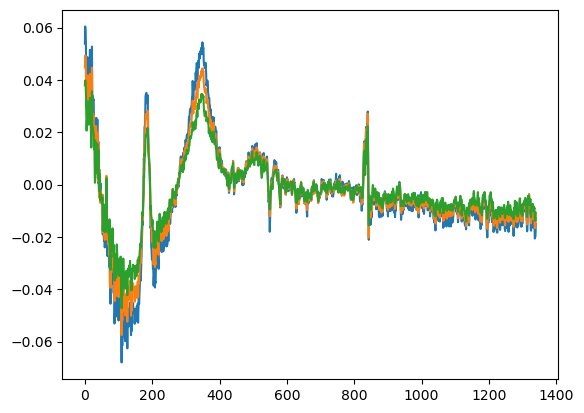

100000


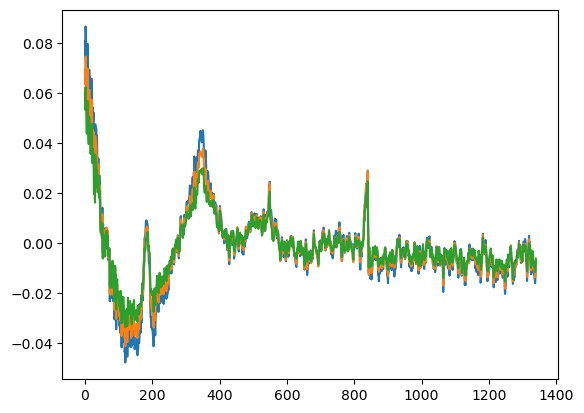

120000


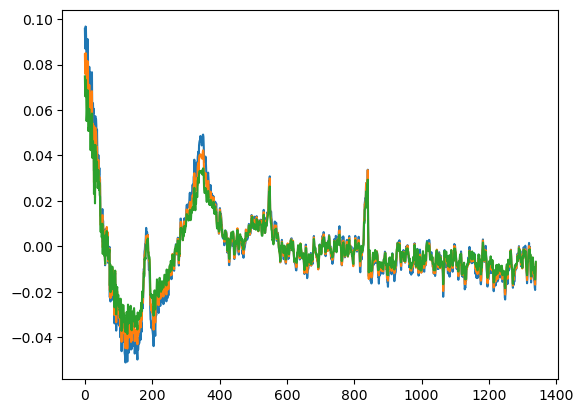

140000


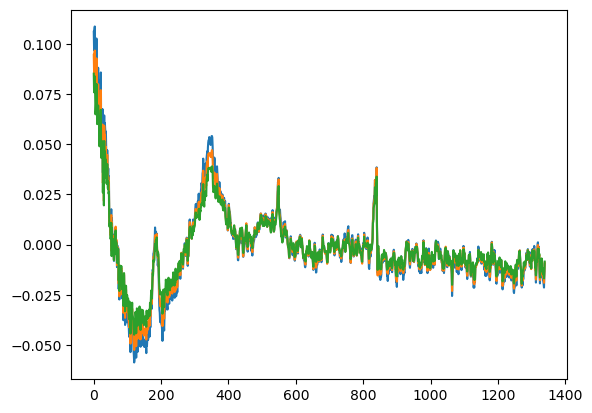

160000


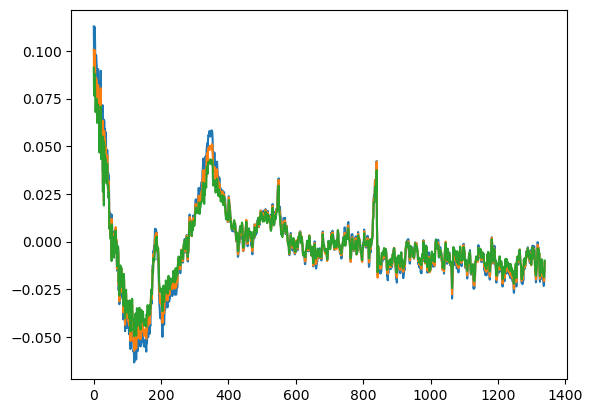

180000


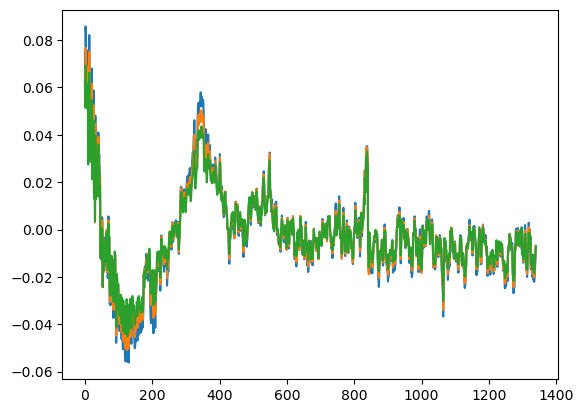

200000


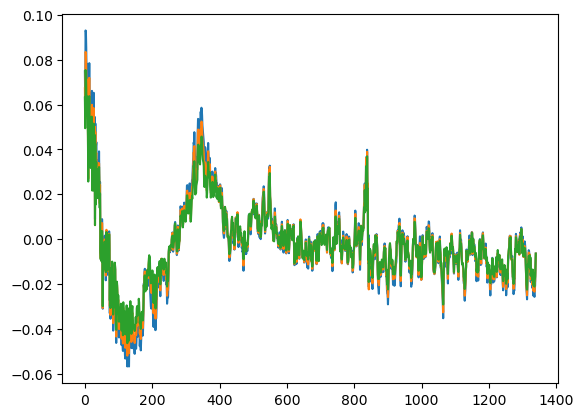

220000


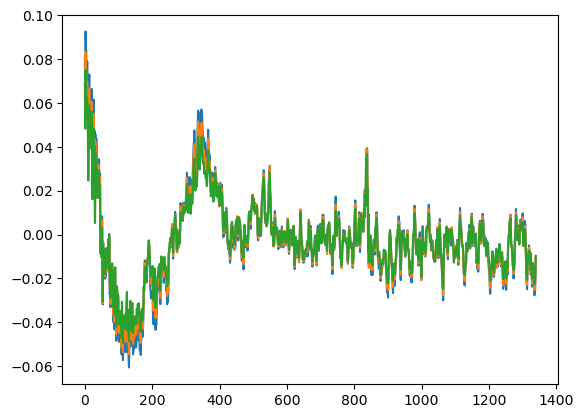

240000


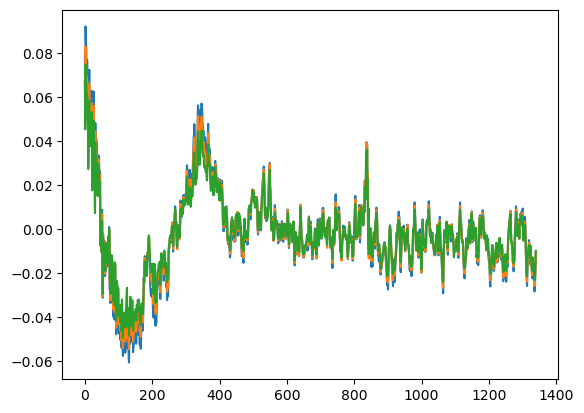

260000


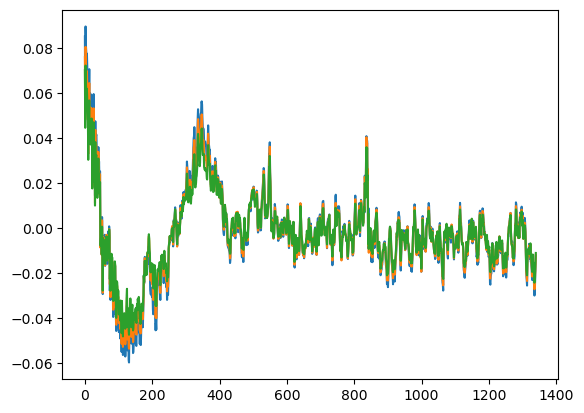

280000


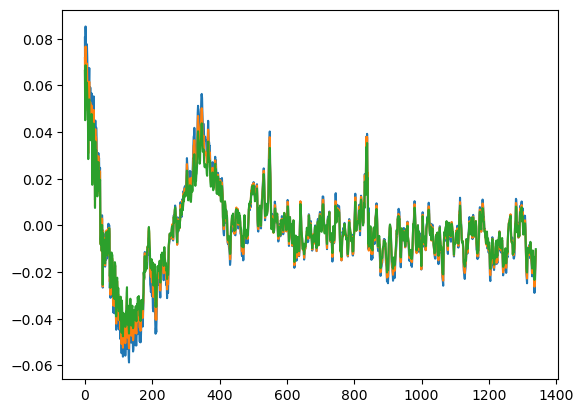

300000


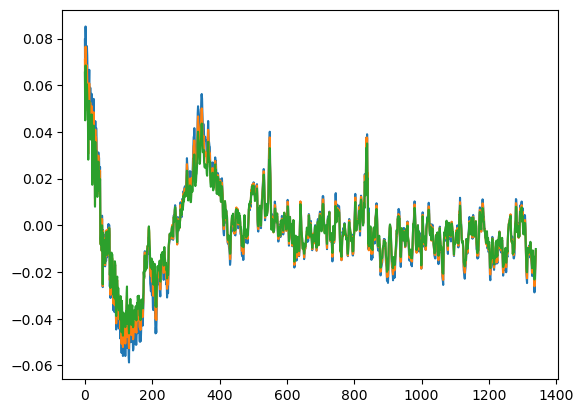

320000


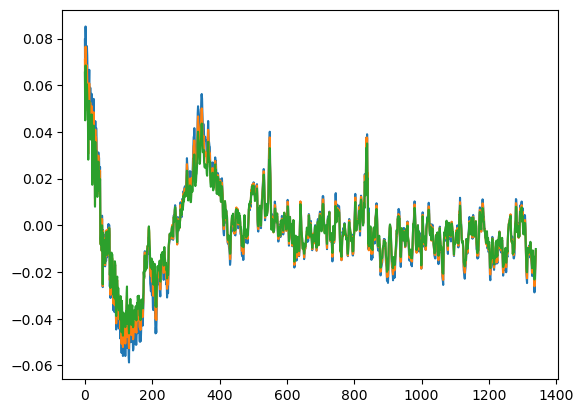

In [30]:
#### create a moving average PCA with time window growing with each iteration
components_gw = []
loadings_gw = []
n_comps = 5



def growing_window_lda(data,y, window_size=20000):
    lda_d = LinearDiscriminantAnalysis(n_components=n_comps)
    print('test')
    for start in range(0, data.shape[0] - window_size + 1, window_size):
            print(start)
            window = data.iloc[0:start + window_size*3, :]
            y_ = y[0:start+window_size*3]
            #plt.plot(y_); plt.show()
            lda_d.fit(window, y_)
            win_transformed = lda_d.transform(window)
            components_gw.append(lda_d.coef_)
            loadings_gw.append(win_transformed)
            plt.plot(lda_d.coef_.T[:, :3]); plt.show()
            #plt.plot(win_transformed[:, 0])
            #plt.title(f'Weights for first modes trained on 20K time step starting from {start}')
            #plt.show()
            #plt.plot(win_transformed[:, 1])
            #plt.plot(win_transformed[:, 2])
            #plt.title(f'Weights for second and third modes trained on 20K time step starting from {start}')
            #plt.show()
            
growing_window_lda(X, y, window_size=20000)

In [31]:
ln = LinearRegression()
training_error = []
testing_error = []
w_size =[]

def growing_window_lda_regressor(data, window_size=10000, n_comps = 3):
    lda__ = LinearDiscriminantAnalysis(n_components=n_comps)
    for start in range(0, data.shape[0] - window_size + 1, window_size):
        print(start)
        w_size.append(start+window_size)
        window = data.iloc[0:start + window_size, :]
        y_ = y.iloc[0:start + window_size]; 
        #plt.plot(y.iloc[0:start + window_size]); plt.show()
        lda__.fit(window, y_)
        win_transfomed= lda__.transform(window)
        #plt.plot(win_transfomed); plt.show()
        #plt.plot(lda__.coef_); plt.show()
        #### trianing #####
        ln.fit(win_transfomed, y_)
        y_train_pred = ln.predict(win_transfomed)
        training_err = np.sqrt(mean_squared_error(y_, y_train_pred))
        training_error.append(training_err)
        print(f'training error with {n_comps} comps is {training_err:3f}')
        test_window = data.iloc[start + window_size:, :]
        test_win_transform = lda__.transform(test_window)
        y_test = y.iloc[start + window_size:]
        y_test_pred =  ln.predict(test_win_transform)
        tt_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
        testing_error.append(tt_error)
        print(f'testing error with {n_comps} comps is {tt_error:3f}')
        plt.plot(y_.values, y_train_pred, 'k')
        plt.plot(y_test.values, y_test_pred, 'r')
        #plt.legend(['n_comp = 3'])
        #plt.title('predicted temp against measured temp'); plt.show()  

#growing_window_lda_regressor(X, window_size=60000, n_comps =3)

0
training error with 1 comps is 0.229615
testing error with 1 comps is 11.456842
60000
training error with 1 comps is 0.663377
testing error with 1 comps is 7.844728
120000
training error with 1 comps is 1.111208
testing error with 1 comps is 2.903778
180000
training error with 1 comps is 1.317493
testing error with 1 comps is 1.779917
240000
training error with 1 comps is 1.210957
testing error with 1 comps is 0.691627


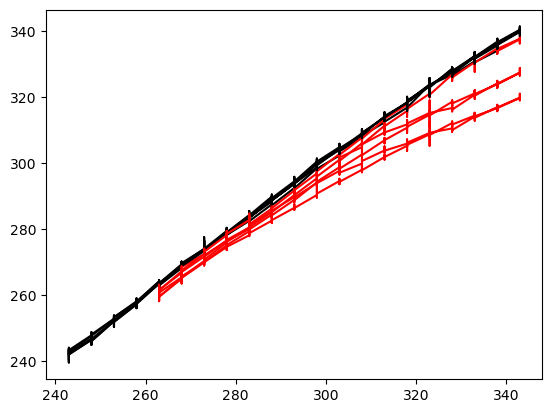

0
training error with 2 comps is 0.229386
testing error with 2 comps is 11.539149
60000
training error with 2 comps is 0.474136
testing error with 2 comps is 6.591098
120000
training error with 2 comps is 0.706341
testing error with 2 comps is 2.940029
180000
training error with 2 comps is 0.558269
testing error with 2 comps is 2.694612
240000
training error with 2 comps is 0.610457
testing error with 2 comps is 0.885762


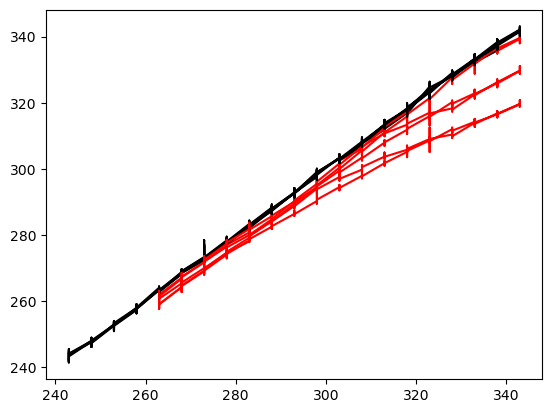

0
training error with 3 comps is 0.226992
testing error with 3 comps is 11.598652
60000
training error with 3 comps is 0.459207
testing error with 3 comps is 6.599854
120000
training error with 3 comps is 0.611588
testing error with 3 comps is 2.679688
180000
training error with 3 comps is 0.558117
testing error with 3 comps is 2.718391
240000
training error with 3 comps is 0.505825
testing error with 3 comps is 0.750225


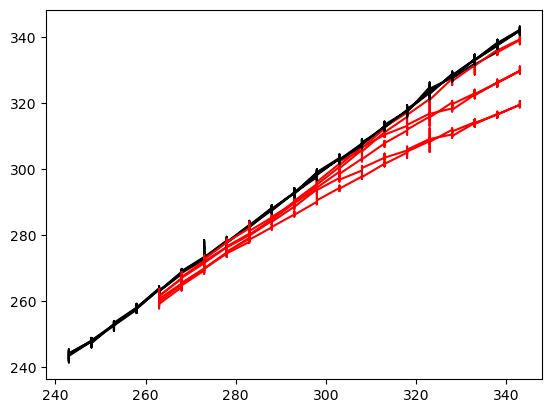

0
training error with 4 comps is 0.225254
testing error with 4 comps is 11.317501
60000
training error with 4 comps is 0.333055
testing error with 4 comps is 6.401047
120000
training error with 4 comps is 0.604621
testing error with 4 comps is 2.609453
180000
training error with 4 comps is 0.558117
testing error with 4 comps is 2.717914
240000
training error with 4 comps is 0.491466
testing error with 4 comps is 0.721844


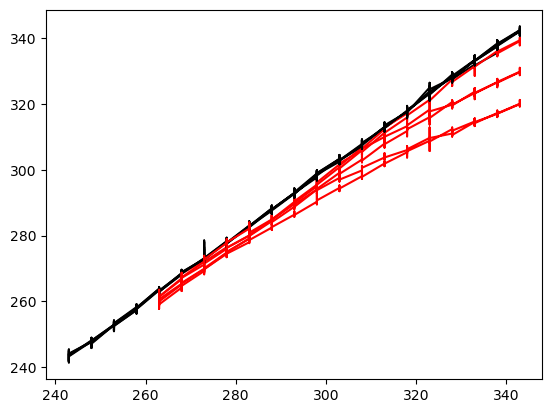

0
training error with 5 comps is 0.225249
testing error with 5 comps is 11.322944
60000
training error with 5 comps is 0.330820
testing error with 5 comps is 5.981788
120000
training error with 5 comps is 0.527002
testing error with 5 comps is 2.138659
180000
training error with 5 comps is 0.481087
testing error with 5 comps is 2.131735
240000
training error with 5 comps is 0.471761
testing error with 5 comps is 0.865469


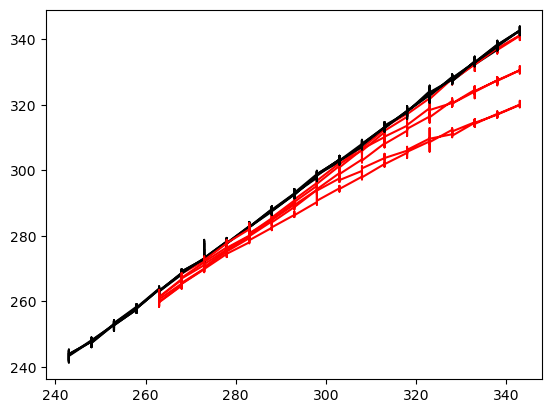

In [32]:
ncomps =[]
for i in range(1,6):
    ncomps.append(i)
    growing_window_lda_regressor(X, window_size=60000, n_comps =i)
    plt.show()

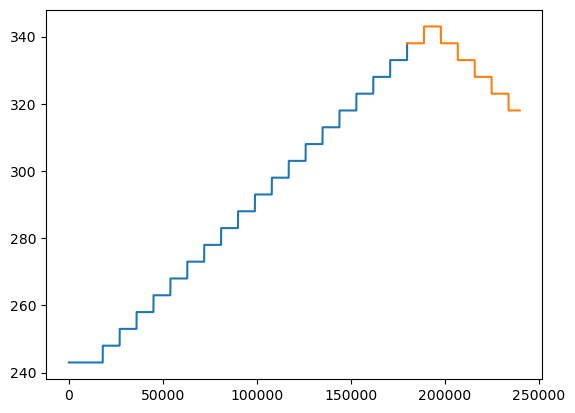

In [33]:
plt.plot(y[:180000])
plt.plot(y[180000:240000])

In [34]:
ls = Lasso(alpha=0.01)
training_error = []
testing_error = []
w_size =[]

def growing_window_lda_lasso(data, window_size=10000, n_comps = 3):
    lda__ = LinearDiscriminantAnalysis(n_components=n_comps)
    for start in range(0, data.shape[0] - window_size + 1, window_size):
        print(start)
        w_size.append(start+window_size)
        window = data.iloc[0:start + window_size, :]
        y_ = y.iloc[0:start + window_size]; 
        #plt.plot(y.iloc[0:start + window_size]); plt.show()
        lda__.fit(window, y_)
        win_transfomed= lda__.transform(window)
        #plt.plot(win_transfomed); plt.show()
        #plt.plot(lda__.coef_); plt.show()
        #### trianing #####
        ls.fit(win_transfomed, y_)
        y_train_pred = ls.predict(win_transfomed)
        training_err = np.sqrt(mean_squared_error(y_, y_train_pred))
        training_error.append(training_err)
        print(f'training error with {n_comps} comps is {training_err:3f}')
        test_window = data.iloc[start + window_size:, :]
        test_win_transform = lda__.transform(test_window)
        y_test = y.iloc[start + window_size:]
        y_test_pred =  ls.predict(test_win_transform)
        tt_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
        testing_error.append(tt_error)
        print(f'testing error with {n_comps} comps is {tt_error:3f}')
        #plt.plot(y_test.values, y_test_pred)
        #plt.legend(['n_comp = 3'])
        #plt.title('predicted temp against measured temp'); plt.show()  



In [35]:
ncomps =[]
for i in range(1,6):
    ncomps.append(i)
    growing_window_lda_lasso(X, window_size=61000, n_comps =i)

0
training error with 1 comps is 0.230330
testing error with 1 comps is 11.483150
61000
training error with 1 comps is 0.664263
testing error with 1 comps is 7.793086
122000
training error with 1 comps is 1.172575
testing error with 1 comps is 2.768243
183000
training error with 1 comps is 1.226461
testing error with 1 comps is 1.780058
244000
training error with 1 comps is 1.206913
testing error with 1 comps is 0.686099
0
training error with 2 comps is 0.229698
testing error with 2 comps is 11.594494
61000
training error with 2 comps is 0.475682
testing error with 2 comps is 6.609200
122000
training error with 2 comps is 0.742543
testing error with 2 comps is 2.937327
183000
training error with 2 comps is 0.555403
testing error with 2 comps is 2.650779
244000
training error with 2 comps is 0.617560
testing error with 2 comps is 0.844182
0
training error with 3 comps is 0.227084
testing error with 3 comps is 11.629502
61000
training error with 3 comps is 0.457755
testing error with 3 c

In [36]:
'''
# =============================================================================
# GP w/.o scaling
# =============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, DotProduct

kernel_ = RBF(length_scale = 1, length_scale_bounds = (1e-3, 100))  + WhiteKernel() + ConstantKernel(constant_value = 1, constant_value_bounds = (1e-3, 1e6))
gp_model = GaussianProcessRegressor(kernel=kernel_)

# fit model
gp_model.fit(loadings_train[:, :], y_train)  # Fit the GP on the current batch
'''

'\n# =============================================================================\n# GP w/.o scaling\n# =============================================================================\nfrom sklearn.gaussian_process import GaussianProcessRegressor\nfrom sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel, DotProduct\n\nkernel_ = RBF(length_scale = 1, length_scale_bounds = (1e-3, 100))  + WhiteKernel() + ConstantKernel(constant_value = 1, constant_value_bounds = (1e-3, 1e6))\ngp_model = GaussianProcessRegressor(kernel=kernel_)\n\n# fit model\ngp_model.fit(loadings_train[:, :], y_train)  # Fit the GP on the current batch\n'

In [37]:
np.sqrt(1.4)

1.1832159566199232

In [38]:
#y_pred_train, std_pred_train = gp_model.predict(loadings_train , return_std=True)

In [39]:
#df_gp_train = pd.DataFrame({'y_pred_train':y_pred_train, 'std_pred_train':std_pred_train})
#df_gp_train.to_csv('../saved_data/gp_training_output')

In [40]:
#plt.plot(std_pred_train, y_train.to_numpy())

In [41]:
#X_reduced_test = pca.transform(X_test)

In [42]:
#y_pred_test, std_pred_test = gp_model.predict(X_reduced_test , return_std=True)

In [43]:
#df_gp_train = pd.DataFrame({'y_pred_test':y_pred_test, 'std_pred_test':std_pred_test,})
#df_gp_train.to_csv('../saved_data/gp_testing_output')

In [44]:
#plt.plot(y_pred_test, y_test,'x')

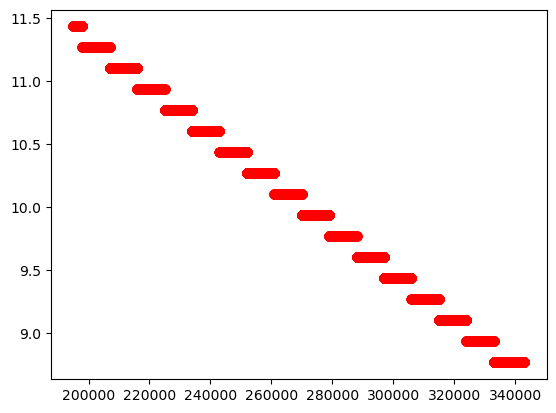

In [45]:
#plt.plot((y_test - y_pred)/std_pred, 'x')
plt.plot(y_test/30, 'ro')

In [46]:
#X_reduced_all = pca.transform(X)
#y_pred_all, std_pred_all = gp_model.predict(X_reduced_all , return_std=True)
#df_gp_train = pd.DataFrame({'y_pred_all':y_pred_all, 'std_pred_all':std_pred_all,})
#df_gp_train.to_csv('../saved_data/gp_all_output')